# **Project Based Internship ID/X Partners**

**By : Hafizh Fadhl Muhammad**

## **Import Packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

## **Load Dataset**

In [3]:
df = pd.read_csv('E:\Project Data Science\Dataset\loan_data_2007_2014.csv')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7648\3330625076.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('E:\Project Data Science\Dataset\loan_data_2007_2014.csv')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7648\3330625076.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('E:\Project Data Science\Dataset\loan_data_2007_2014.csv')


## **Data Understanding**

In [10]:
df

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
0                4975.0   36 months     10.65       162.87     B  ...   
1                2500.0   60 months     15.27        59.83     C  ...   
2                2400.0   36 months     15.96        84.33     C  ...   
3               10000.0   36 months     13.49       339.31     C  ...   
4                3000.0   60 months     12.69        67.79     B  ...   
...                 ...         ...       ...          ...   ...  ...   
466280          18400.0   60 months     14.47       432.64     C  ...   
466281          22000.0   60 months     19.97       582.50     D  ...   
466282          20700.0   60 months     16.99       514.34     D  ...   
466283           2000.0   36 months      7.90        62.59     A  ...   
466284           9975.0   36 months     19.20       367.58     D  ...   

       total_bal_il il_util open_rv_12m open_rv_24m  max_bal_bc all_util  \
0               NaN     NaN         NaN         NaN         NaN      NaN   
1               NaN     NaN         NaN         NaN         NaN      NaN   
2               NaN     NaN         NaN         NaN         NaN      NaN   
3               NaN     NaN         NaN         NaN         NaN      NaN   
4               NaN     NaN         NaN         NaN         NaN      NaN   
...             ...     ...         ...         ...         ...      ...   
466280          NaN     NaN         NaN         NaN         NaN      NaN   
466281          NaN     NaN         NaN         NaN         NaN      NaN   
466282          NaN     NaN         NaN         NaN         NaN      NaN   
466283          NaN     NaN         NaN         NaN         NaN      NaN   
466284          NaN     NaN         NaN         NaN         NaN      NaN   

       total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  
0                   NaN    NaN         NaN          NaN  
1                   NaN    NaN         NaN          NaN  
2                   NaN    NaN         NaN          NaN  
3                   NaN    NaN         NaN          NaN  
4                   NaN    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
466280          29900.0    NaN         NaN          NaN  
466281          39400.0    NaN         NaN          NaN  
466282          13100.0    NaN         NaN          NaN  
466283          53100.0    NaN         NaN          NaN  
466284          16000.0    NaN         NaN          NaN  

[466285 rows x 75 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
df.describe()

Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  funded_amnt_inv       int_rate    installment  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14291.801044     14222.329888      13.829236     432.061201   
std      8274.371300      8297.637788       4.357587     243.485550   
min       500.000000         0.000000       5.420000      15.670000   
25%      8000.000000      8000.000000      10.990000     256.690000   
50%     12000.000000     12000.000000      13.660000     379.890000   
75%     20000.000000     19950.000000      16.490000     566.580000   
max     35000.000000     35000.000000      26.060000    1409.990000   

         annual_inc            dti  ...  total_bal_il  il_util  open_rv_12m  \
count  4.662810e+05  466285.000000  ...           0.0      0.0          0.0   
mean   7.327738e+04      17.218758  ...           NaN      NaN          NaN   
std    5.496357e+04       7.851121  ...           NaN      NaN          NaN   
min    1.896000e+03       0.000000  ...           NaN      NaN          NaN   
25%    4.500000e+04      11.360000  ...           NaN      NaN          NaN   
50%    6.300000e+04      16.870000  ...           NaN      NaN          NaN   
75%    8.896000e+04      22.780000  ...           NaN      NaN          NaN   
max    7.500000e+06      39.990000  ...           NaN      NaN          NaN   

       open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
count          0.0         0.0       0.0      3.960090e+05     0.0   
mean           NaN         NaN       NaN      3.037909e+04     NaN   
std            NaN         NaN       NaN      3.724713e+04     NaN   
min            NaN         NaN       NaN      0.000000e+00     NaN   
25%            NaN         NaN       NaN      1.350000e+04     NaN   
50%            NaN         NaN       NaN      2.280000e+04     NaN   
75%            NaN         NaN       NaN      3.790000e+04     NaN   
max            NaN         NaN       NaN      9.999999e+06     NaN   

       total_cu_tl  inq_last_12m  
count          0.0           0.0  
mean           NaN           NaN  
std            NaN           NaN  
min            NaN           NaN  
25%            NaN           NaN  
50%            NaN           NaN  
75%            NaN           NaN  
max            NaN           NaN  

[8 rows x 53 columns]

In [6]:
df.shape

(466285, 75)

In [7]:
df.sample()

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
413675      413675  13567322   15619668      16000        16000   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
413675          16000.0   36 months       7.9       500.65     A  ...   

       total_bal_il il_util open_rv_12m open_rv_24m  max_bal_bc all_util  \
413675          NaN     NaN         NaN         NaN         NaN      NaN   

       total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  
413675          19500.0    NaN         NaN          NaN  

[1 rows x 75 columns]

In [11]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

## **Data Quality Check**

### **Data Cleansing**

In [15]:
to_drop = [
    # UNIQUE ID
    'id',
    'member_id',
    'zip_code',

    # TEXT
    'url',
    'desc',
    
    # UNNECESSARY
    'addr_state',            

    # NULL COLUMNS
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m'
]

df.drop(to_drop, axis=1, inplace=True)

### **Missing Values**

In [16]:
vars = []

for f in df.columns:
    missings = df[f].isnull().sum()
    if missings > 0:
        vars.append(f)
        percentage = missings / df.shape[0]

        print('Variable {} has {} records ({:.2%}) with missing values'.format(
            f, missings, percentage))

print('In total, there are {} variables with missing values'.format(len(vars)))

Variable emp_title has 27588 records (5.92%) with missing values
Variable emp_length has 21008 records (4.51%) with missing values
Variable annual_inc has 4 records (0.00%) with missing values
Variable title has 21 records (0.00%) with missing values
Variable delinq_2yrs has 29 records (0.01%) with missing values
Variable earliest_cr_line has 29 records (0.01%) with missing values
Variable inq_last_6mths has 29 records (0.01%) with missing values
Variable mths_since_last_delinq has 250351 records (53.69%) with missing values
Variable mths_since_last_record has 403647 records (86.57%) with missing values
Variable open_acc has 29 records (0.01%) with missing values
Variable pub_rec has 29 records (0.01%) with missing values
Variable revol_util has 340 records (0.07%) with missing values
Variable total_acc has 29 records (0.01%) with missing values
Variable last_pymnt_d has 376 records (0.08%) with missing values
Variable next_pymnt_d has 227214 records (48.73%) with missing values
Variab

In [17]:
# HANDLING COLUMNS WITH MISSING VALUES > 50%
to_drop = [
    'mths_since_last_delinq',
    'mths_since_last_record',
    'mths_since_last_major_derog'
]
df.drop(to_drop, axis=1)

# HANDLING MISSING VALUES IN NUMERICAL COLUMNS
mean_imp = SimpleImputer(strategy='mean')
for f in df.columns:
    if df[f].dtype in ['int64', 'float64']:
        df[f] = mean_imp.fit_transform(df[[f]]).ravel()

## **Exploratory Data Analysis**

In [18]:
df.shape

(466285, 52)

In [19]:
categorical = df.select_dtypes(include='object').columns
numerical = df.select_dtypes(exclude='object').columns

print(len(categorical) , " " , len(numerical))

18   34


In [20]:
df[categorical].nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
purpose                    14
title                   63098
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
next_pymnt_d              100
last_credit_pull_d        103
application_type            1
dtype: int64

In [21]:
df[numerical].nunique()

Unnamed: 0                     466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
int_rate                          506
installment                     55622
annual_inc                      31902
dti                              3997
delinq_2yrs                        25
inq_last_6mths                     29
mths_since_last_delinq            146
mths_since_last_record            124
open_acc                           63
pub_rec                            27
revol_bal                       58142
revol_util                       1270
total_acc                         113
out_prncp                      135665
out_prncp_inv                  141189
total_pymnt                    351609
total_pymnt_inv                347659
total_rec_prncp                172713
total_rec_int                  270249
total_rec_late_fee               5808
recoveries                      22773
collection_recovery_fee         20275
last_pymnt_a

In [22]:
to_drop = [
    'emp_title',
    'title',
    'application_type',
    'policy_code',
]
df.drop(to_drop, axis=1, inplace=True)

categorical = [col for col in categorical if col not in to_drop]
numerical = [col for col in numerical if col not in to_drop]

### **Categorical Data**

In [23]:
temp = []

for col in categorical:
    if df[col].nunique() <= 14:
        temp.append(col)
        
len(temp)

9

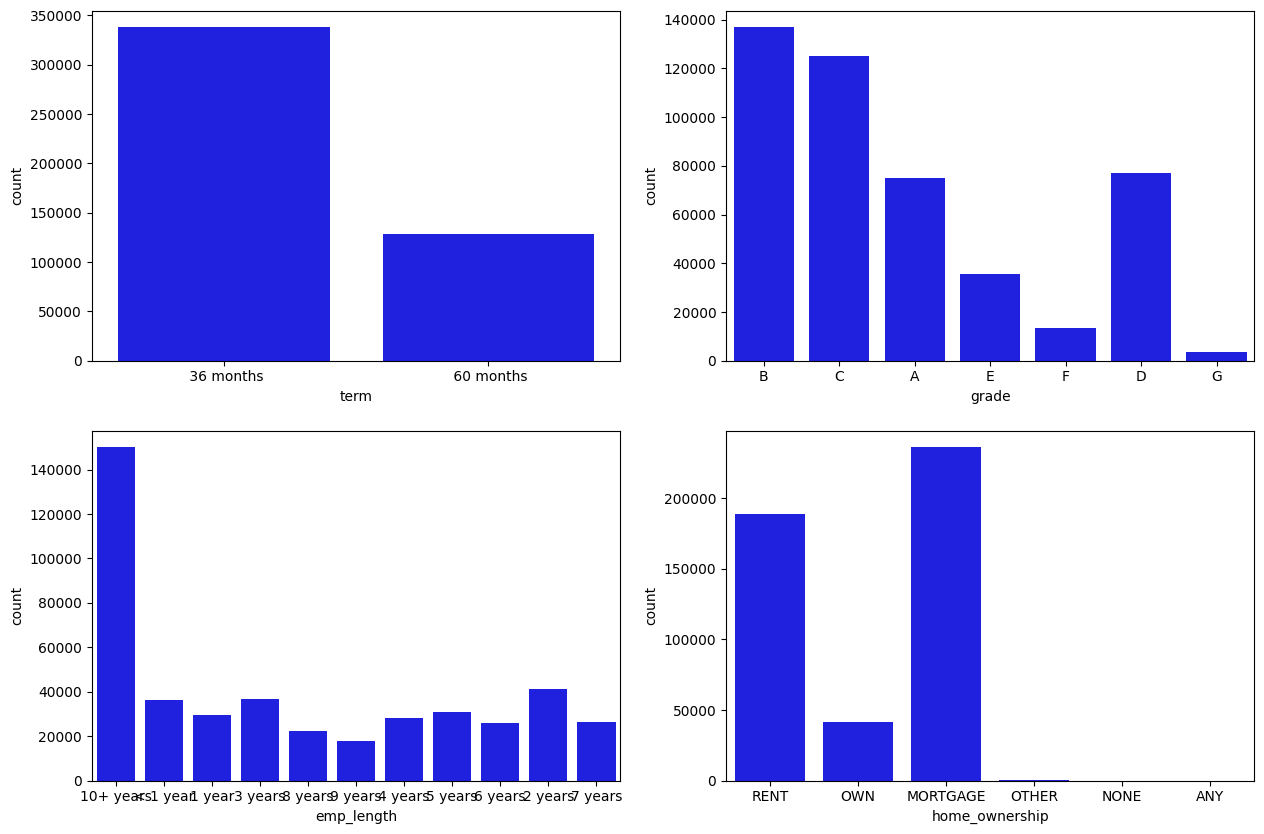

In [25]:
fig = plt.figure(figsize=(15, 10))

columns = 2
rows = 2

for i in range(4):
    fig.add_subplot(rows, columns, i+1)
    sns.countplot(data=df, x=temp[i], color='b')

plt.show()

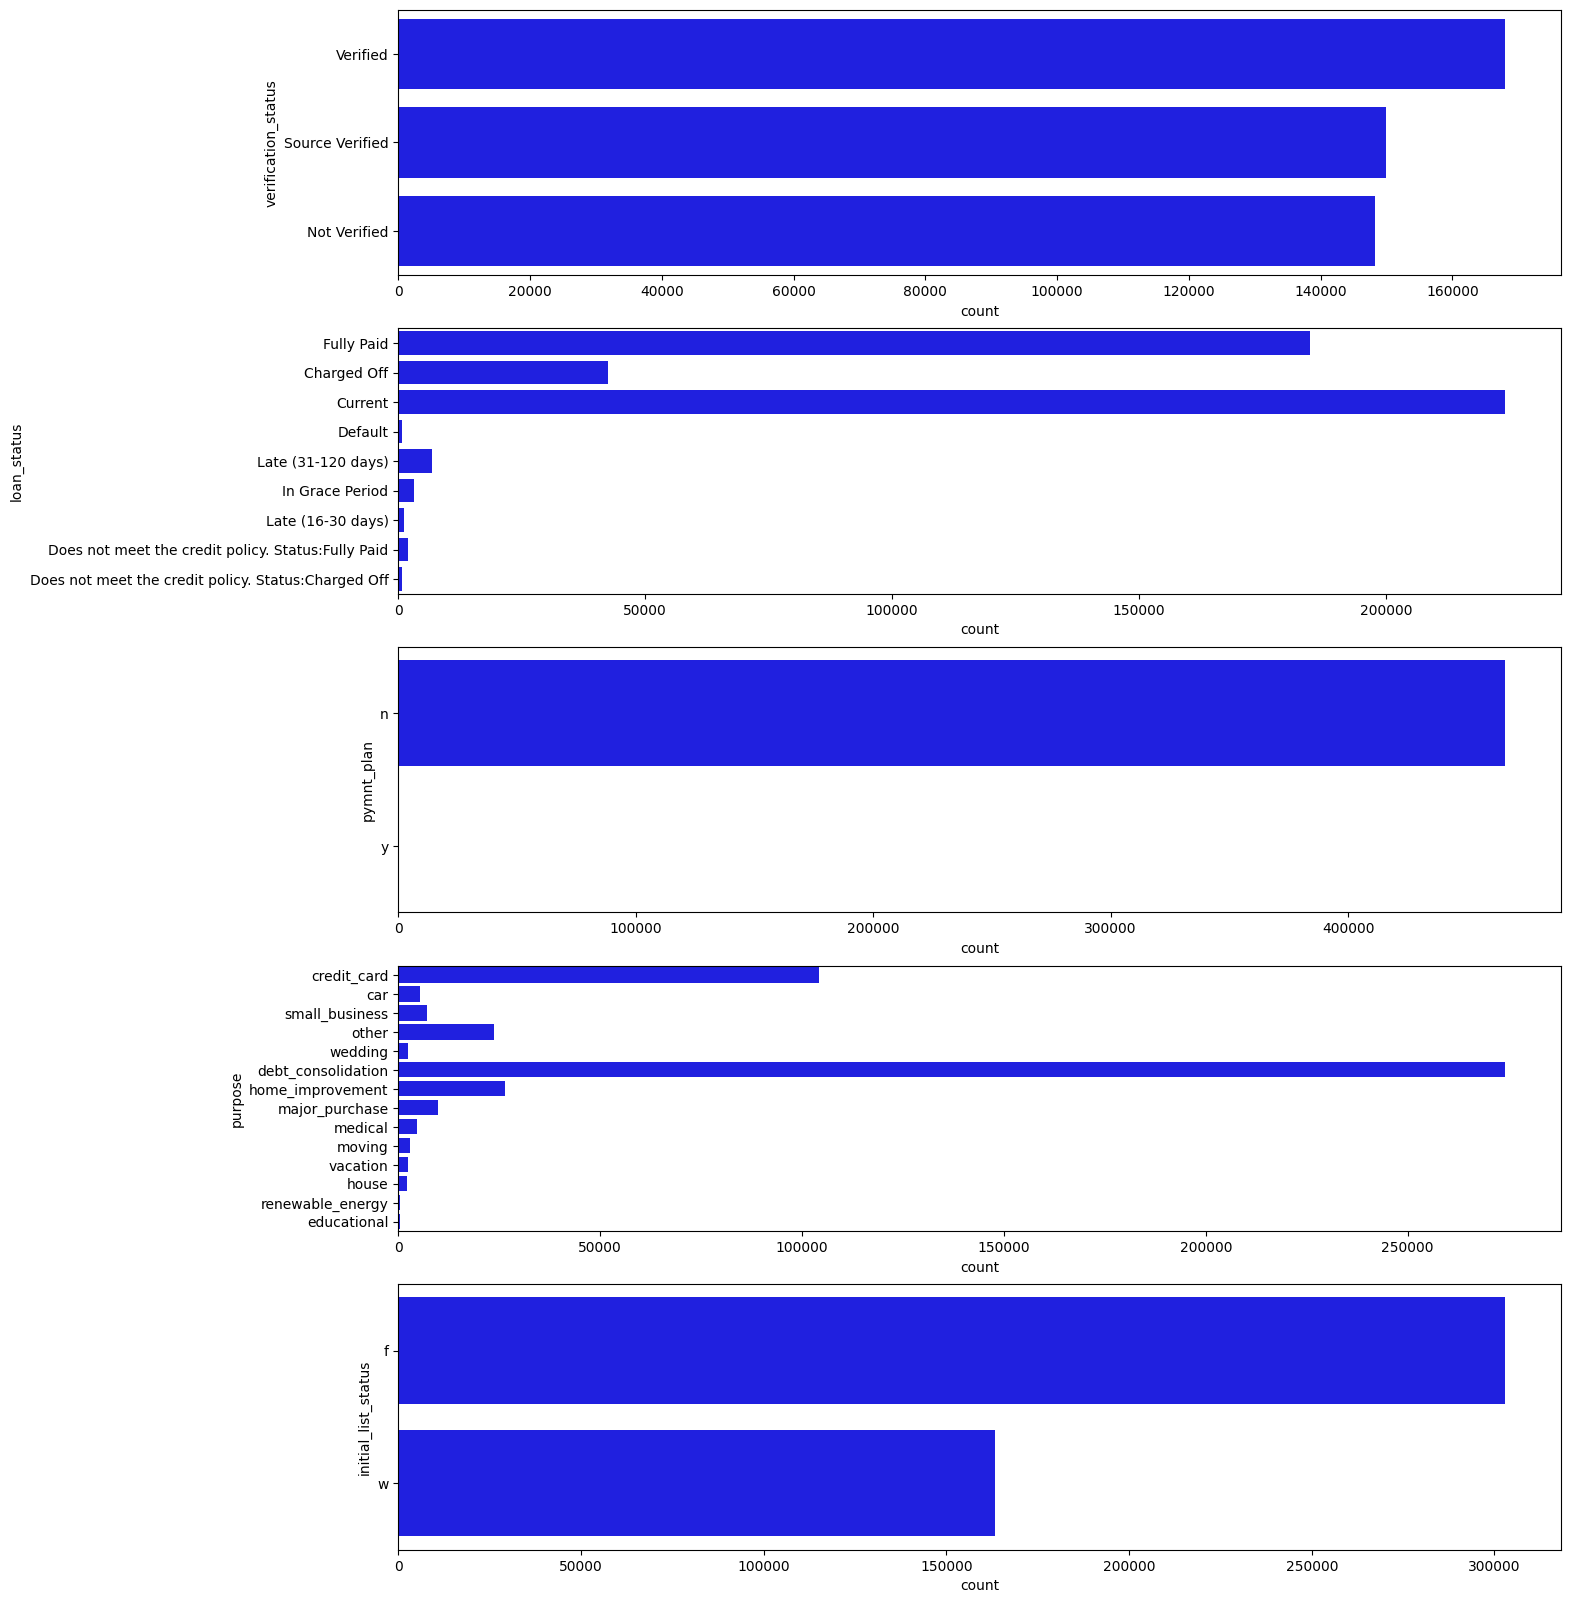

In [27]:
fig = plt.figure(figsize=(15, 20))

columns = 1
rows = 5

for i in range(5):
    fig.add_subplot(rows, columns, i+1)
    sns.countplot(data=df, y=temp[i+4], color='b')
        
plt.show()

In [28]:
to_drop = ['pymnt_plan']

df.drop(to_drop, axis=1, inplace=True)

categorical = [col for col in categorical if col not in to_drop]

In [29]:
for col in categorical:
    print(col)
    print(df[col].unique())
    print()

term
[' 36 months' ' 60 months']

grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']

sub_grade
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']

emp_length
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

verification_status
['Verified' 'Source Verified' 'Not Verified']

issue_d
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 'Nov-07' 'Oct-07' 'Sep

In [30]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format = '%b-%y')

In [31]:
df['pymnt_time'] = (df['next_pymnt_d'] - df['last_pymnt_d']).dt.days // 30
df['credit_duration'] = (df['last_credit_pull_d'] - df['earliest_cr_line']).dt.days // 365

In [32]:
print(len(df[df['credit_duration'] < 0]) , len(df[df['pymnt_time'] < 0]))

1168 0


In [33]:
df['last_credit_pull_d'].unique()
df['earliest_cr_line'].unique()

<DatetimeArray>
['1985-01-01 00:00:00', '1999-04-01 00:00:00', '2001-11-01 00:00:00',
 '1996-02-01 00:00:00', '1996-01-01 00:00:00', '2004-11-01 00:00:00',
 '2005-07-01 00:00:00', '2007-01-01 00:00:00', '2004-04-01 00:00:00',
 '2004-09-01 00:00:00',
 ...
 '2054-01-01 00:00:00', '2057-01-01 00:00:00', '2044-01-01 00:00:00',
 '2050-10-01 00:00:00', '2048-01-01 00:00:00', '2061-07-01 00:00:00',
 '2058-05-01 00:00:00', '2053-01-01 00:00:00', '2050-05-01 00:00:00',
 '2056-11-01 00:00:00']
Length: 665, dtype: datetime64[ns]

In [34]:
print(df['pymnt_time'].isnull().sum() , ' ' , df['credit_duration'].isnull().sum())

227226   70


In [35]:
df['pymnt_time'] = df['pymnt_time'].fillna(0)
df['credit_duration'] = df['credit_duration'].fillna(0)
df.loc[df['credit_duration'] < 0, 'credit_duration'] = 0

drop = [
    'earliest_cr_line',
    'last_credit_pull_d',
    'next_pymnt_d',
    'last_pymnt_d',
    'issue_d'
]
df.drop(drop, axis=1, inplace=True)

In [36]:
df['term'] = df['term'].str.replace(' months', '')
df['term'] = df['term'].astype(float)

In [37]:
target_dict = {'< 1 year': 0,
               '1 year': 1,
               '2 years': 2,
               '3 years': 3,
               '4 years': 4,
               '5 years': 5,
               '6 years': 6,
               '7 years': 7,
               '8 years': 8,
               '9 years': 9,
               '10+ years': 10}

df["emp_length"] = df["emp_length"].map(target_dict)
df['emp_length'] = df['emp_length'].fillna(-1)

In [38]:
target_dict = {'G': 0,
               'F': 1,
               'E': 2,
               'D': 3,
               'C': 4,
               'B': 5,
               'A': 6}

df["grade"] = df["grade"].map(target_dict)

In [39]:
def to_value(row):
    valid_starts = ('A', 'B', 'C', 'D', 'E', 'F', 'G')
    if row.startswith(valid_starts):
        val = int(row[1])
        return val if 1 <= val <= 5 else 0
    else:
        return 0
    
df['sub_grade'] = df["sub_grade"].apply(to_value)

In [40]:
target_dict = {
    'RENT': 'RENT',
    'MORTGAGE': 'MORTGAGE',
    'OWN': 'OWN',
    'OTHER': 'OTHER',
    'ANY': 'OTHER',
    'NONE': 'OTHER'
}

df["home_ownership"] = df["home_ownership"].map(target_dict)

In [41]:
categorical = df.select_dtypes(include='object').columns

categorical = [col for col in categorical if col != 'loan_status']

onehot = pd.get_dummies(df[categorical])

onehot = onehot.astype(int)
onehot.head()

home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   0   

   home_ownership_RENT  verification_status_Not Verified  \
0                    1                                 0   
1                    1                                 0   
2                    1                                 1   
3                    1                                 0   
4                    1                                 0   

   verification_status_Source Verified  verification_status_Verified  \
0                                    0                             1   
1                                    1                             0   
2                                    0                             0   
3                                    1                             0   
4                                    1                             0   

   purpose_car  purpose_credit_card  purpose_debt_consolidation  ...  \
0            0                    1                           0  ...   
1            1                    0                           0  ...   
2            0                    0                           0  ...   
3            0                    0                           0  ...   
4            0                    0                           0  ...   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                       0                0               0              0   
1                       0                0               0              0   
2                       0                0               0              0   
3                       0                0               0              1   
4                       0                0               0              1   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                         0                       0                 0   
1                         0                       0                 0   
2                         0                       1                 0   
3                         0                       0                 0   
4                         0                       0                 0   

   purpose_wedding  initial_list_status_f  initial_list_status_w  
0                0                      1                      0  
1                0                      1                      0  
2                0                      1                      0  
3                0                      1                      0  
4                0                      1                      0  

[5 rows x 23 columns]

In [42]:
df.sample(10)

Unnamed: 0  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
33198      33198.0    16000.0      16000.0         15350.00  36.0     14.96   
442768    442768.0    35000.0      35000.0         35000.00  36.0     11.99   
341167    341167.0    10000.0      10000.0         10000.00  36.0     12.99   
234926    234926.0     1000.0       1000.0          1000.00  36.0      8.67   
39253      39253.0    12800.0      12800.0          5241.05  36.0      9.45   
380963    380963.0    20000.0      20000.0         20000.00  36.0     16.99   
422185    422185.0    21000.0      21000.0         21000.00  60.0     14.64   
203526    203526.0     6500.0       6500.0          6500.00  36.0      7.90   
93295      93295.0    20675.0      20675.0         20675.00  60.0     22.20   
392562    392562.0    10000.0      10000.0          9950.00  36.0     14.99   

        installment  grade  sub_grade  emp_length  ...  \
33198        554.32      3          2         6.0  ...   
442768      1162.34      5          3        10.0  ...   
341167       336.90      4          1         2.0  ...   
234926        31.65      5          1         0.0  ...   
39253        409.73      5          1         9.0  ...   
380963       712.96      3          3         2.0  ...   
422185       495.63      4          3        -1.0  ...   
203526       203.39      6          4         2.0  ...   
93295        573.38      2          4         7.0  ...   
392562       346.61      4          5        10.0  ...   

       collection_recovery_fee  last_pymnt_amnt collections_12_mths_ex_med  \
33198                   0.0000           641.37                        0.0   
442768                  0.0000          1162.34                        0.0   
341167                  0.0000           336.90                        0.0   
234926                  0.0000            31.65                        0.0   
39253                   0.0000           411.52                        0.0   
380963                  0.0000           712.96                        0.0   
422185                688.1562           495.63                        0.0   
203526                  0.0000           203.39                        0.0   
93295                 466.9344           202.87                        0.0   
392562                  0.0000          8086.87                        0.0   

       mths_since_last_major_derog acc_now_delinq  tot_coll_amt  \
33198                    42.852547            0.0    191.913517   
442768                   42.852547            0.0      0.000000   
341167                   42.852547            0.0      0.000000   
234926                   42.852547            0.0      0.000000   
39253                    42.852547            0.0    191.913517   
380963                   42.852547            0.0      0.000000   
422185                   42.852547            0.0    753.000000   
203526                   42.852547            0.0    191.913517   
93295                    42.852547            0.0      0.000000   
392562                   42.852547            0.0      0.000000   

          tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_duration  
33198   138801.713385      30379.087771         0.0             17.0  
442768  212104.000000      65800.000000         6.0             29.0  
341167  127831.000000      17400.000000         1.0             10.0  
234926   27461.000000      27000.000000         1.0             14.0  
39253   138801.713385      30379.087771         0.0             17.0  
380963  149599.000000      24200.000000         1.0             17.0  
422185  116501.000000       8700.000000         0.0             23.0  
203526  138801.713385      30379.087771         0.0             14.0  
93295    20883.000000      16300.000000         0.0             11.0  
392562   26693.000000      15400.000000         0.0             31.0  

[10 rows x 44 columns]

### **Numerical Data**

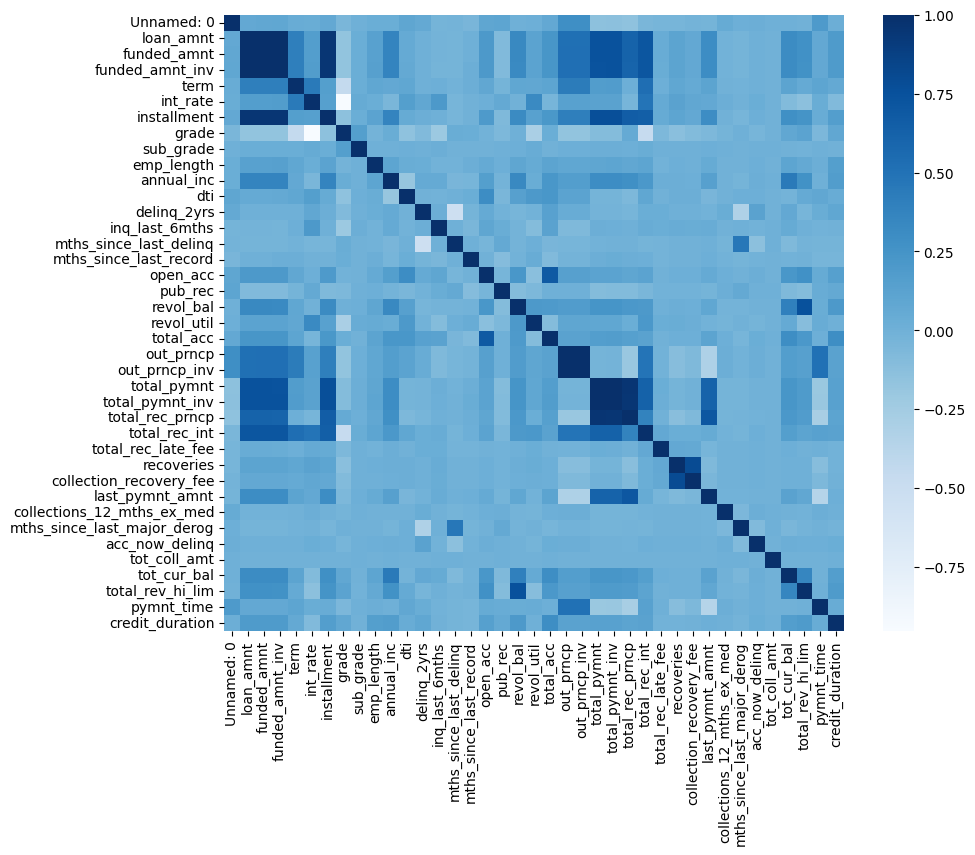

In [45]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), cmap='Blues')
plt.show()

In [46]:
corr_data = numeric_data.corr().abs()
upper = corr_data.where(np.triu(np.ones(corr_data.shape, dtype=bool), k=1))

high_corr = [col for col in upper.columns if any(upper[col] > 0.7)]

print(high_corr)

['funded_amnt', 'funded_amnt_inv', 'installment', 'grade', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'collection_recovery_fee', 'last_pymnt_amnt', 'total_rev_hi_lim']


In [47]:
df.drop(high_corr, axis=1, inplace=True)

numerical = df.select_dtypes(include=['float64', 'int64']).columns

df.head()

Unnamed: 0  loan_amnt  term  int_rate  sub_grade  emp_length  \
0         0.0     5000.0  36.0     10.65          2        10.0   
1         1.0     2500.0  60.0     15.27          4         0.0   
2         2.0     2400.0  36.0     15.96          5        10.0   
3         3.0    10000.0  36.0     13.49          1        10.0   
4         4.0     3000.0  60.0     12.69          5         1.0   

  home_ownership  annual_inc verification_status  loan_status  ... out_prncp  \
0           RENT     24000.0            Verified   Fully Paid  ...       0.0   
1           RENT     30000.0     Source Verified  Charged Off  ...       0.0   
2           RENT     12252.0        Not Verified   Fully Paid  ...       0.0   
3           RENT     49200.0     Source Verified   Fully Paid  ...       0.0   
4           RENT     80000.0     Source Verified      Current  ...     766.9   

   total_rec_late_fee  recoveries  collections_12_mths_ex_med  \
0                0.00        0.00                         0.0   
1                0.00      117.08                         0.0   
2                0.00        0.00                         0.0   
3               16.97        0.00                         0.0   
4                0.00        0.00                         0.0   

   mths_since_last_major_derog  acc_now_delinq  tot_coll_amt    tot_cur_bal  \
0                    42.852547             0.0    191.913517  138801.713385   
1                    42.852547             0.0    191.913517  138801.713385   
2                    42.852547             0.0    191.913517  138801.713385   
3                    42.852547             0.0    191.913517  138801.713385   
4                    42.852547             0.0    191.913517  138801.713385   

   pymnt_time  credit_duration  
0         0.0             31.0  
1         0.0             14.0  
2         0.0             14.0  
3         0.0             18.0  
4         1.0             20.0  

[5 rows x 32 columns]

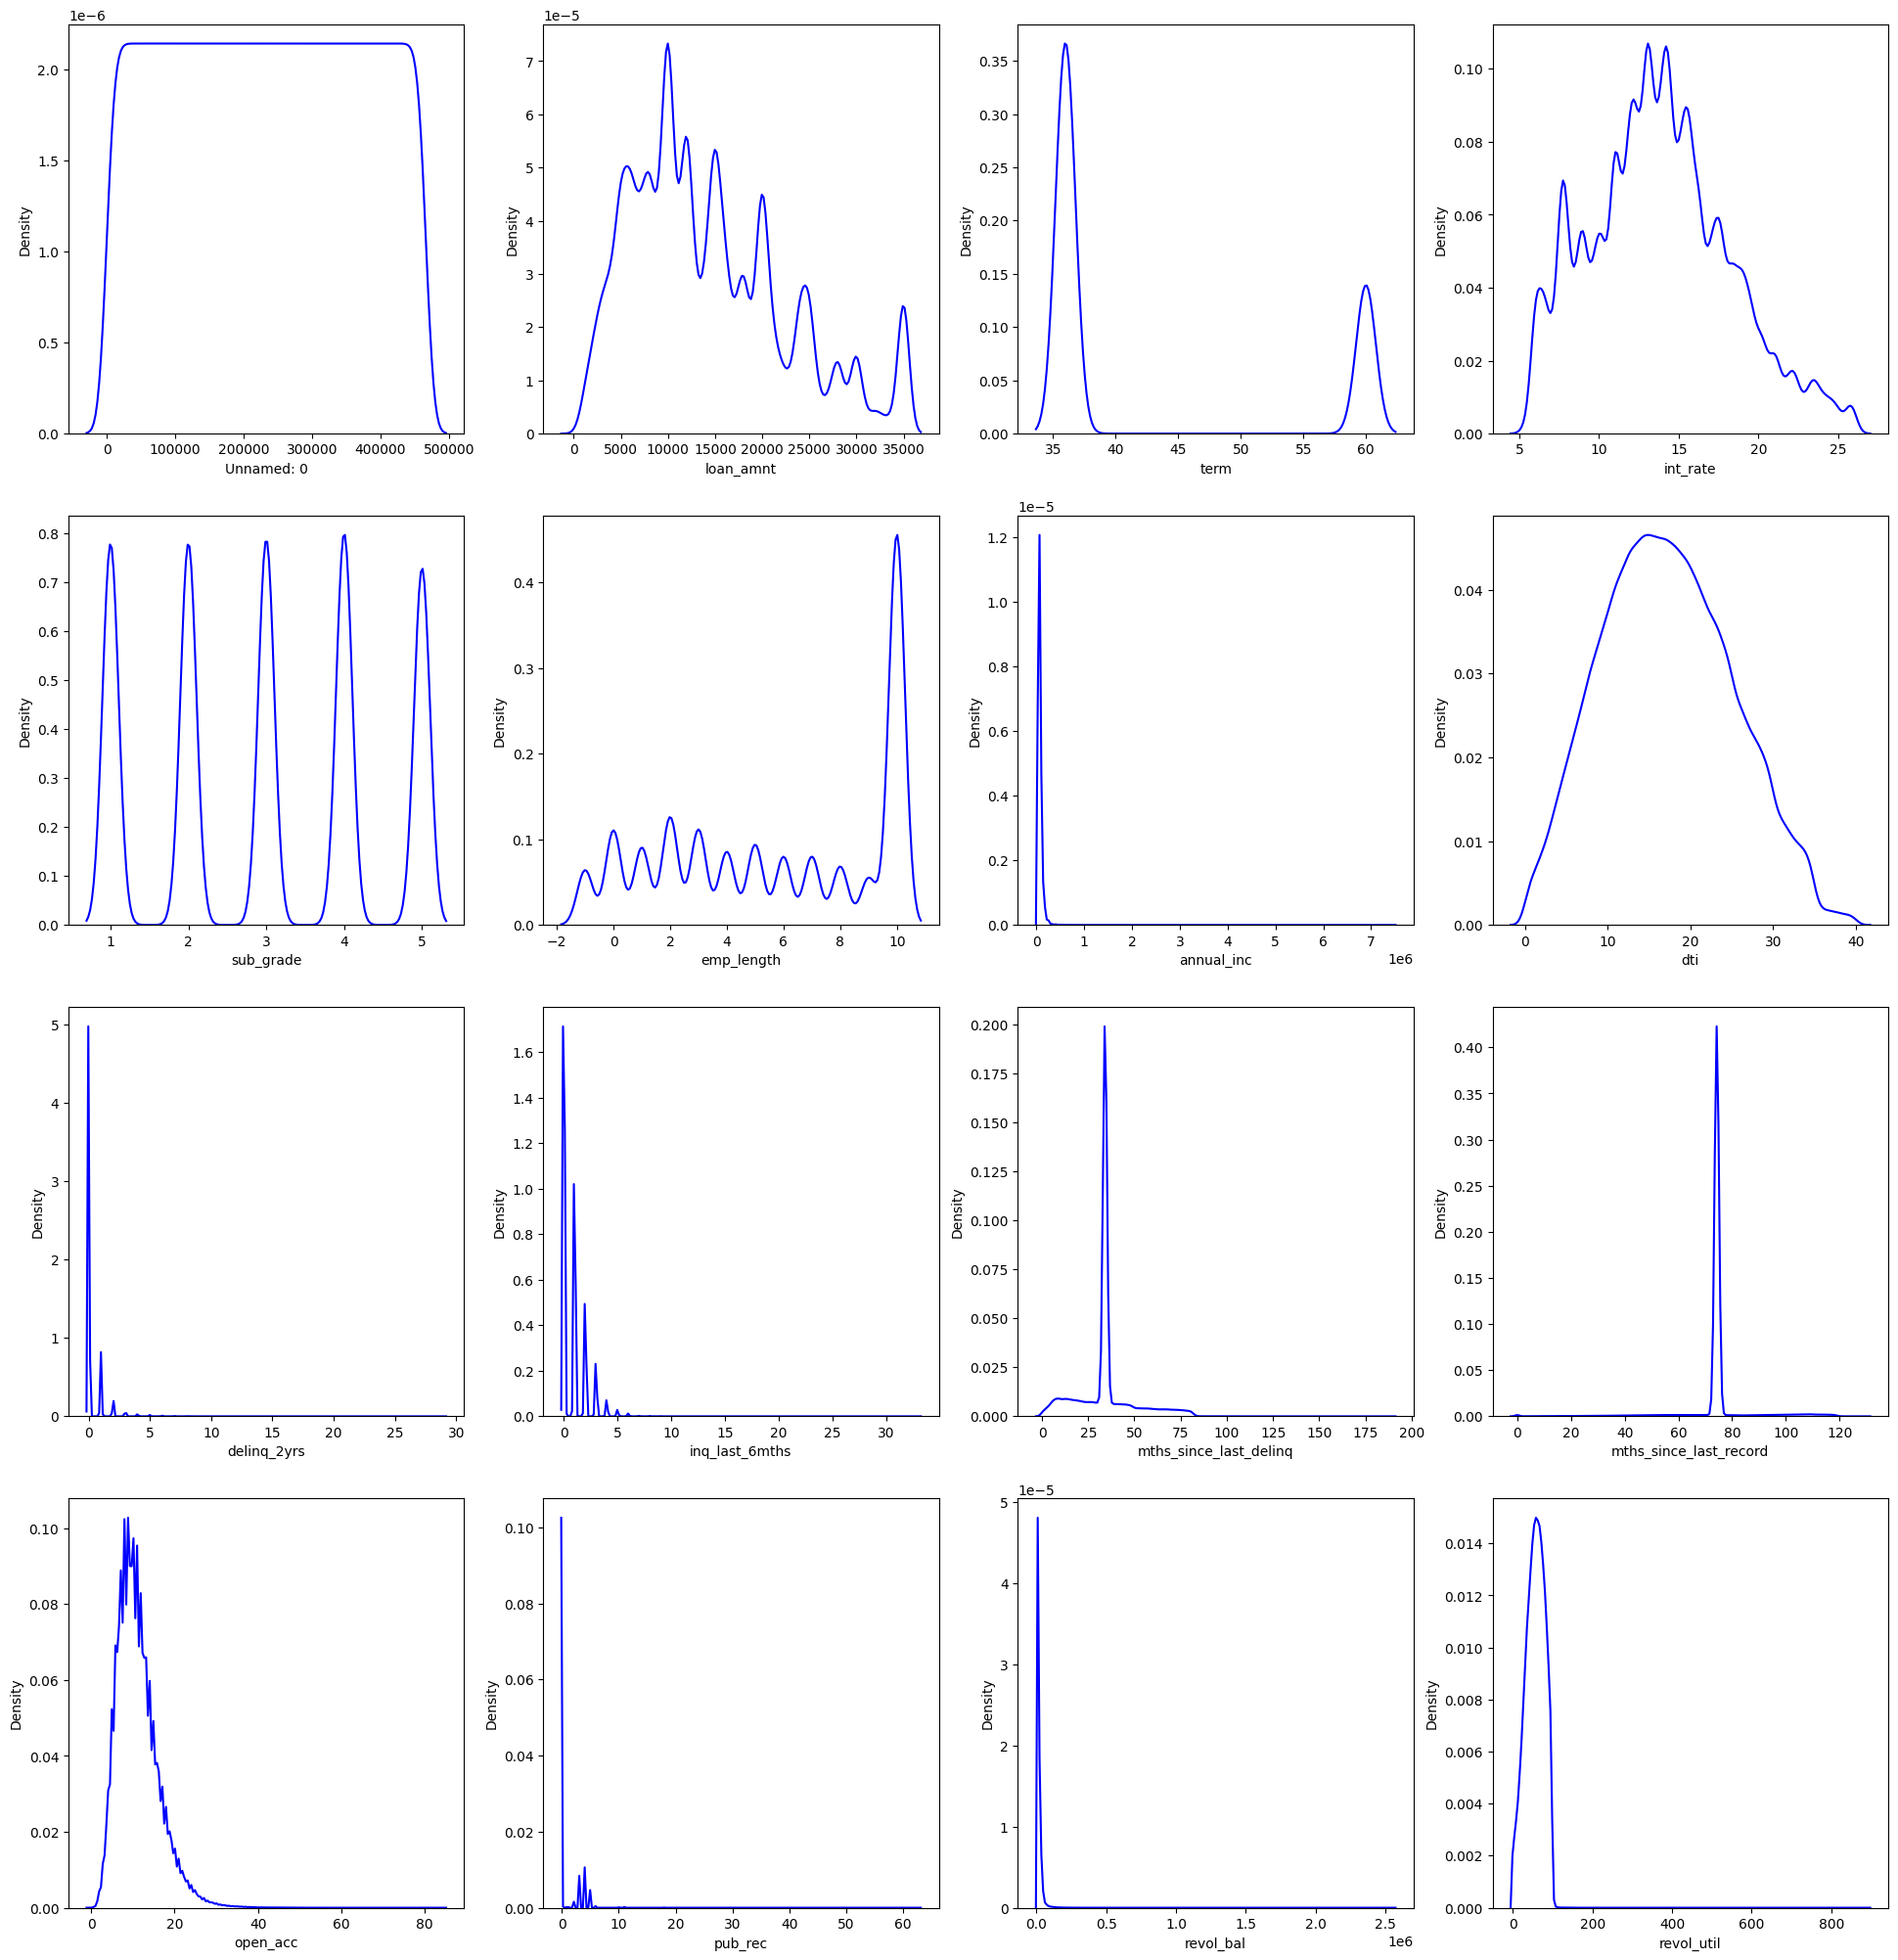

In [48]:
fig = plt.figure(figsize=(24, 25))

columns = 4
rows = 4


for i in range(16):
    fig.add_subplot(rows, columns, i+1)
    sns.kdeplot(df[numerical[i]], color="b")
    
plt.show()

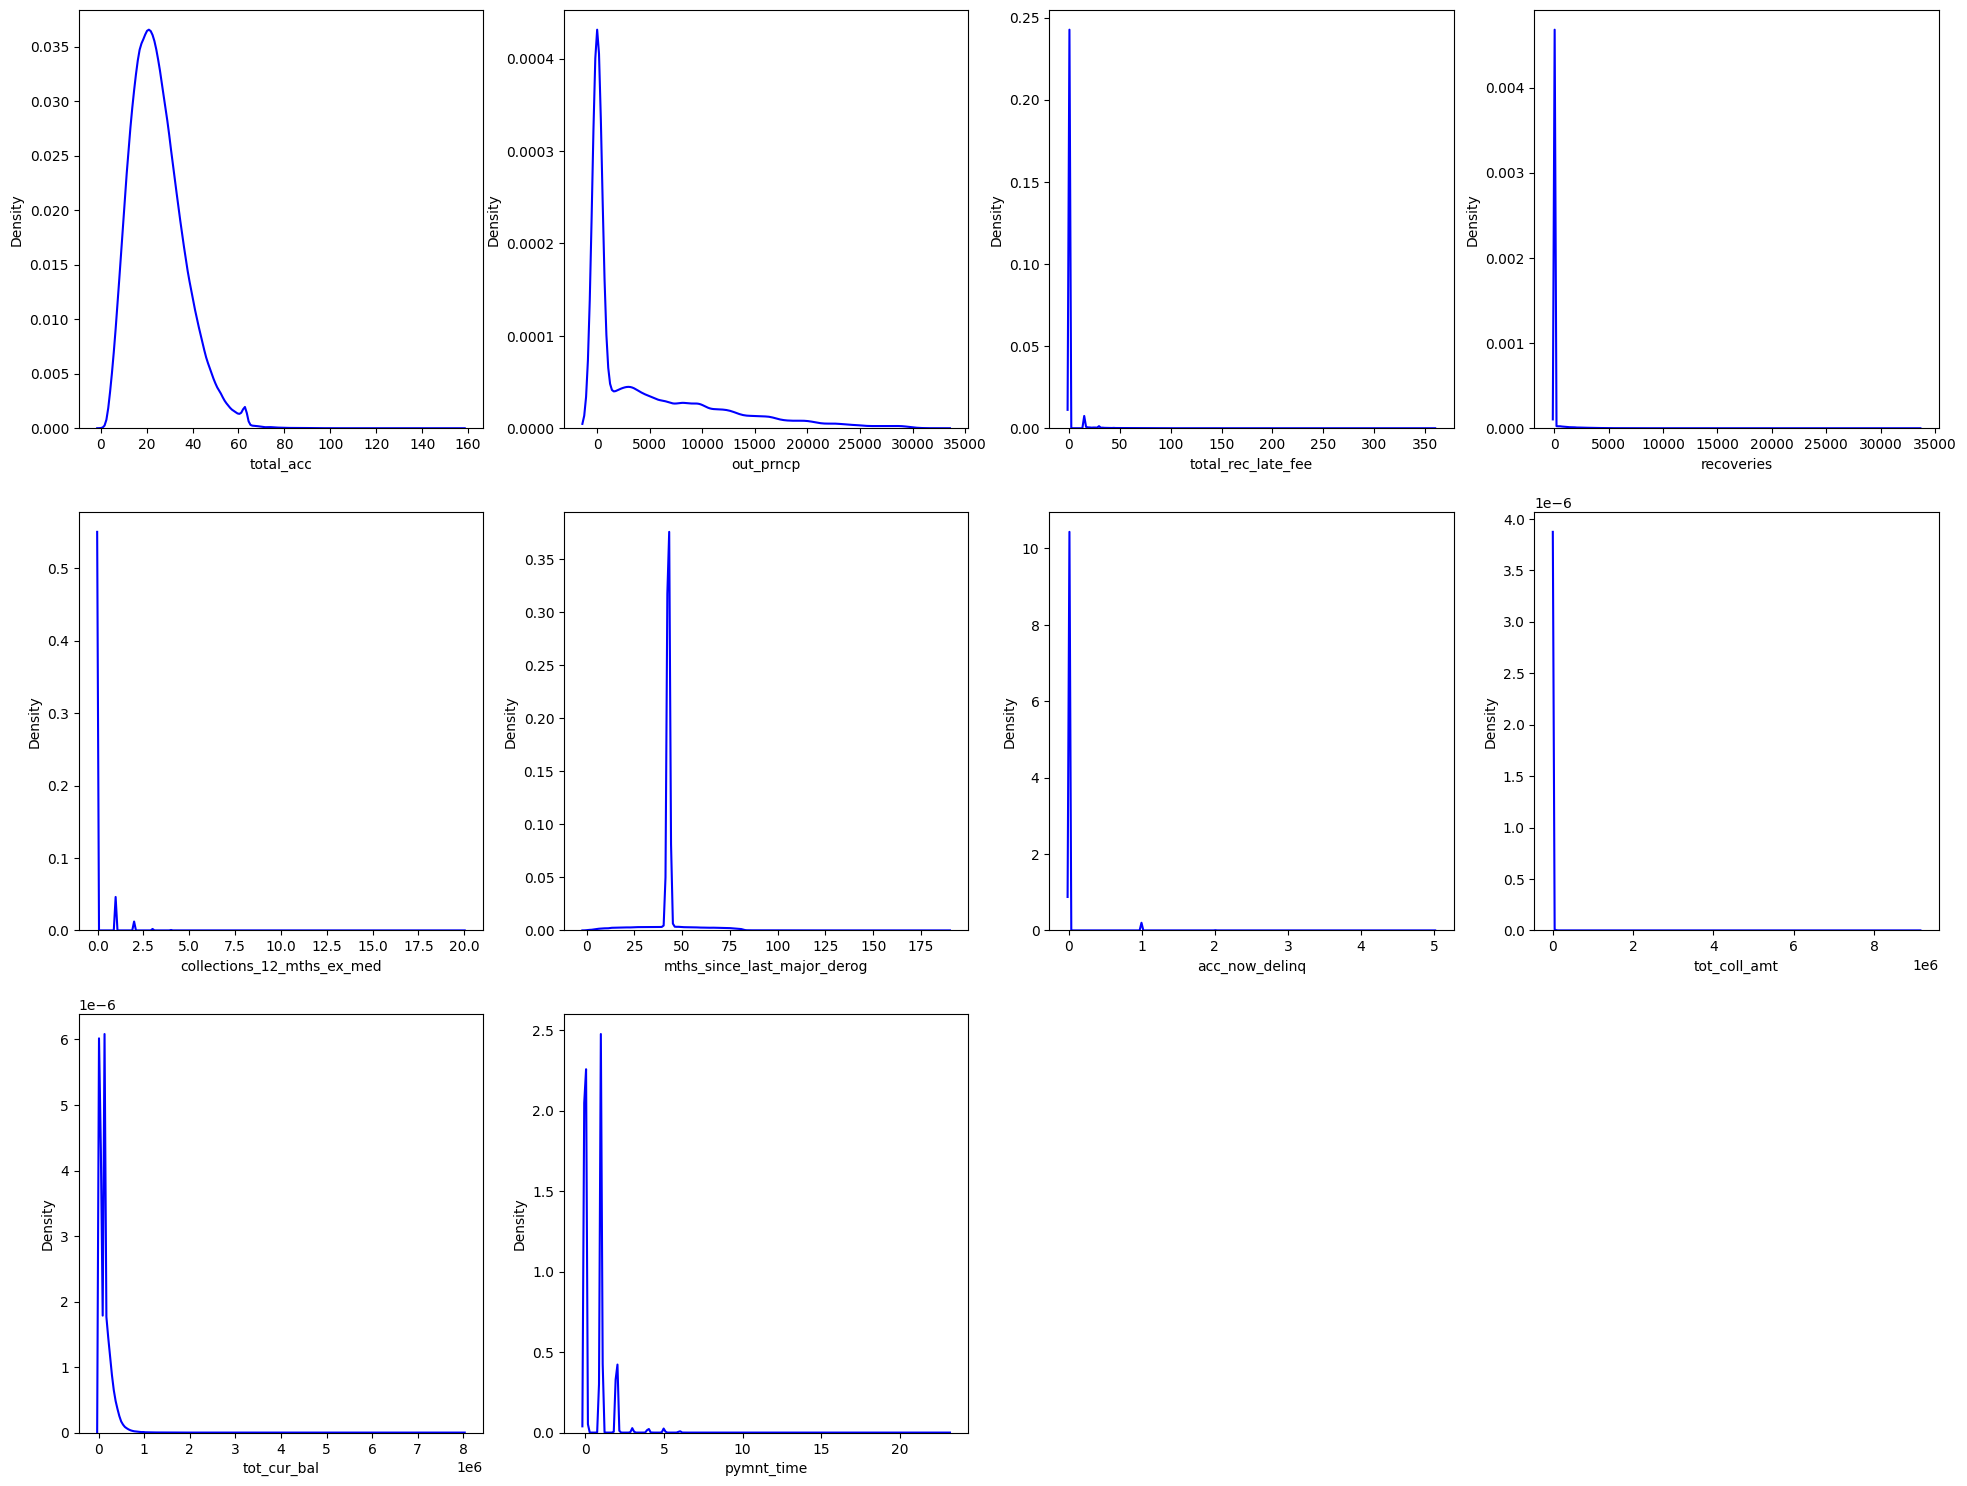

In [50]:
fig = plt.figure(figsize=(24, 25))

columns = 4
rows = 4

index = len(numerical) - 16

for i in range(10):
    fig.add_subplot(rows, columns, i+1) 
    sns.kdeplot(df[numerical[i+16]], color="b")

plt.show()

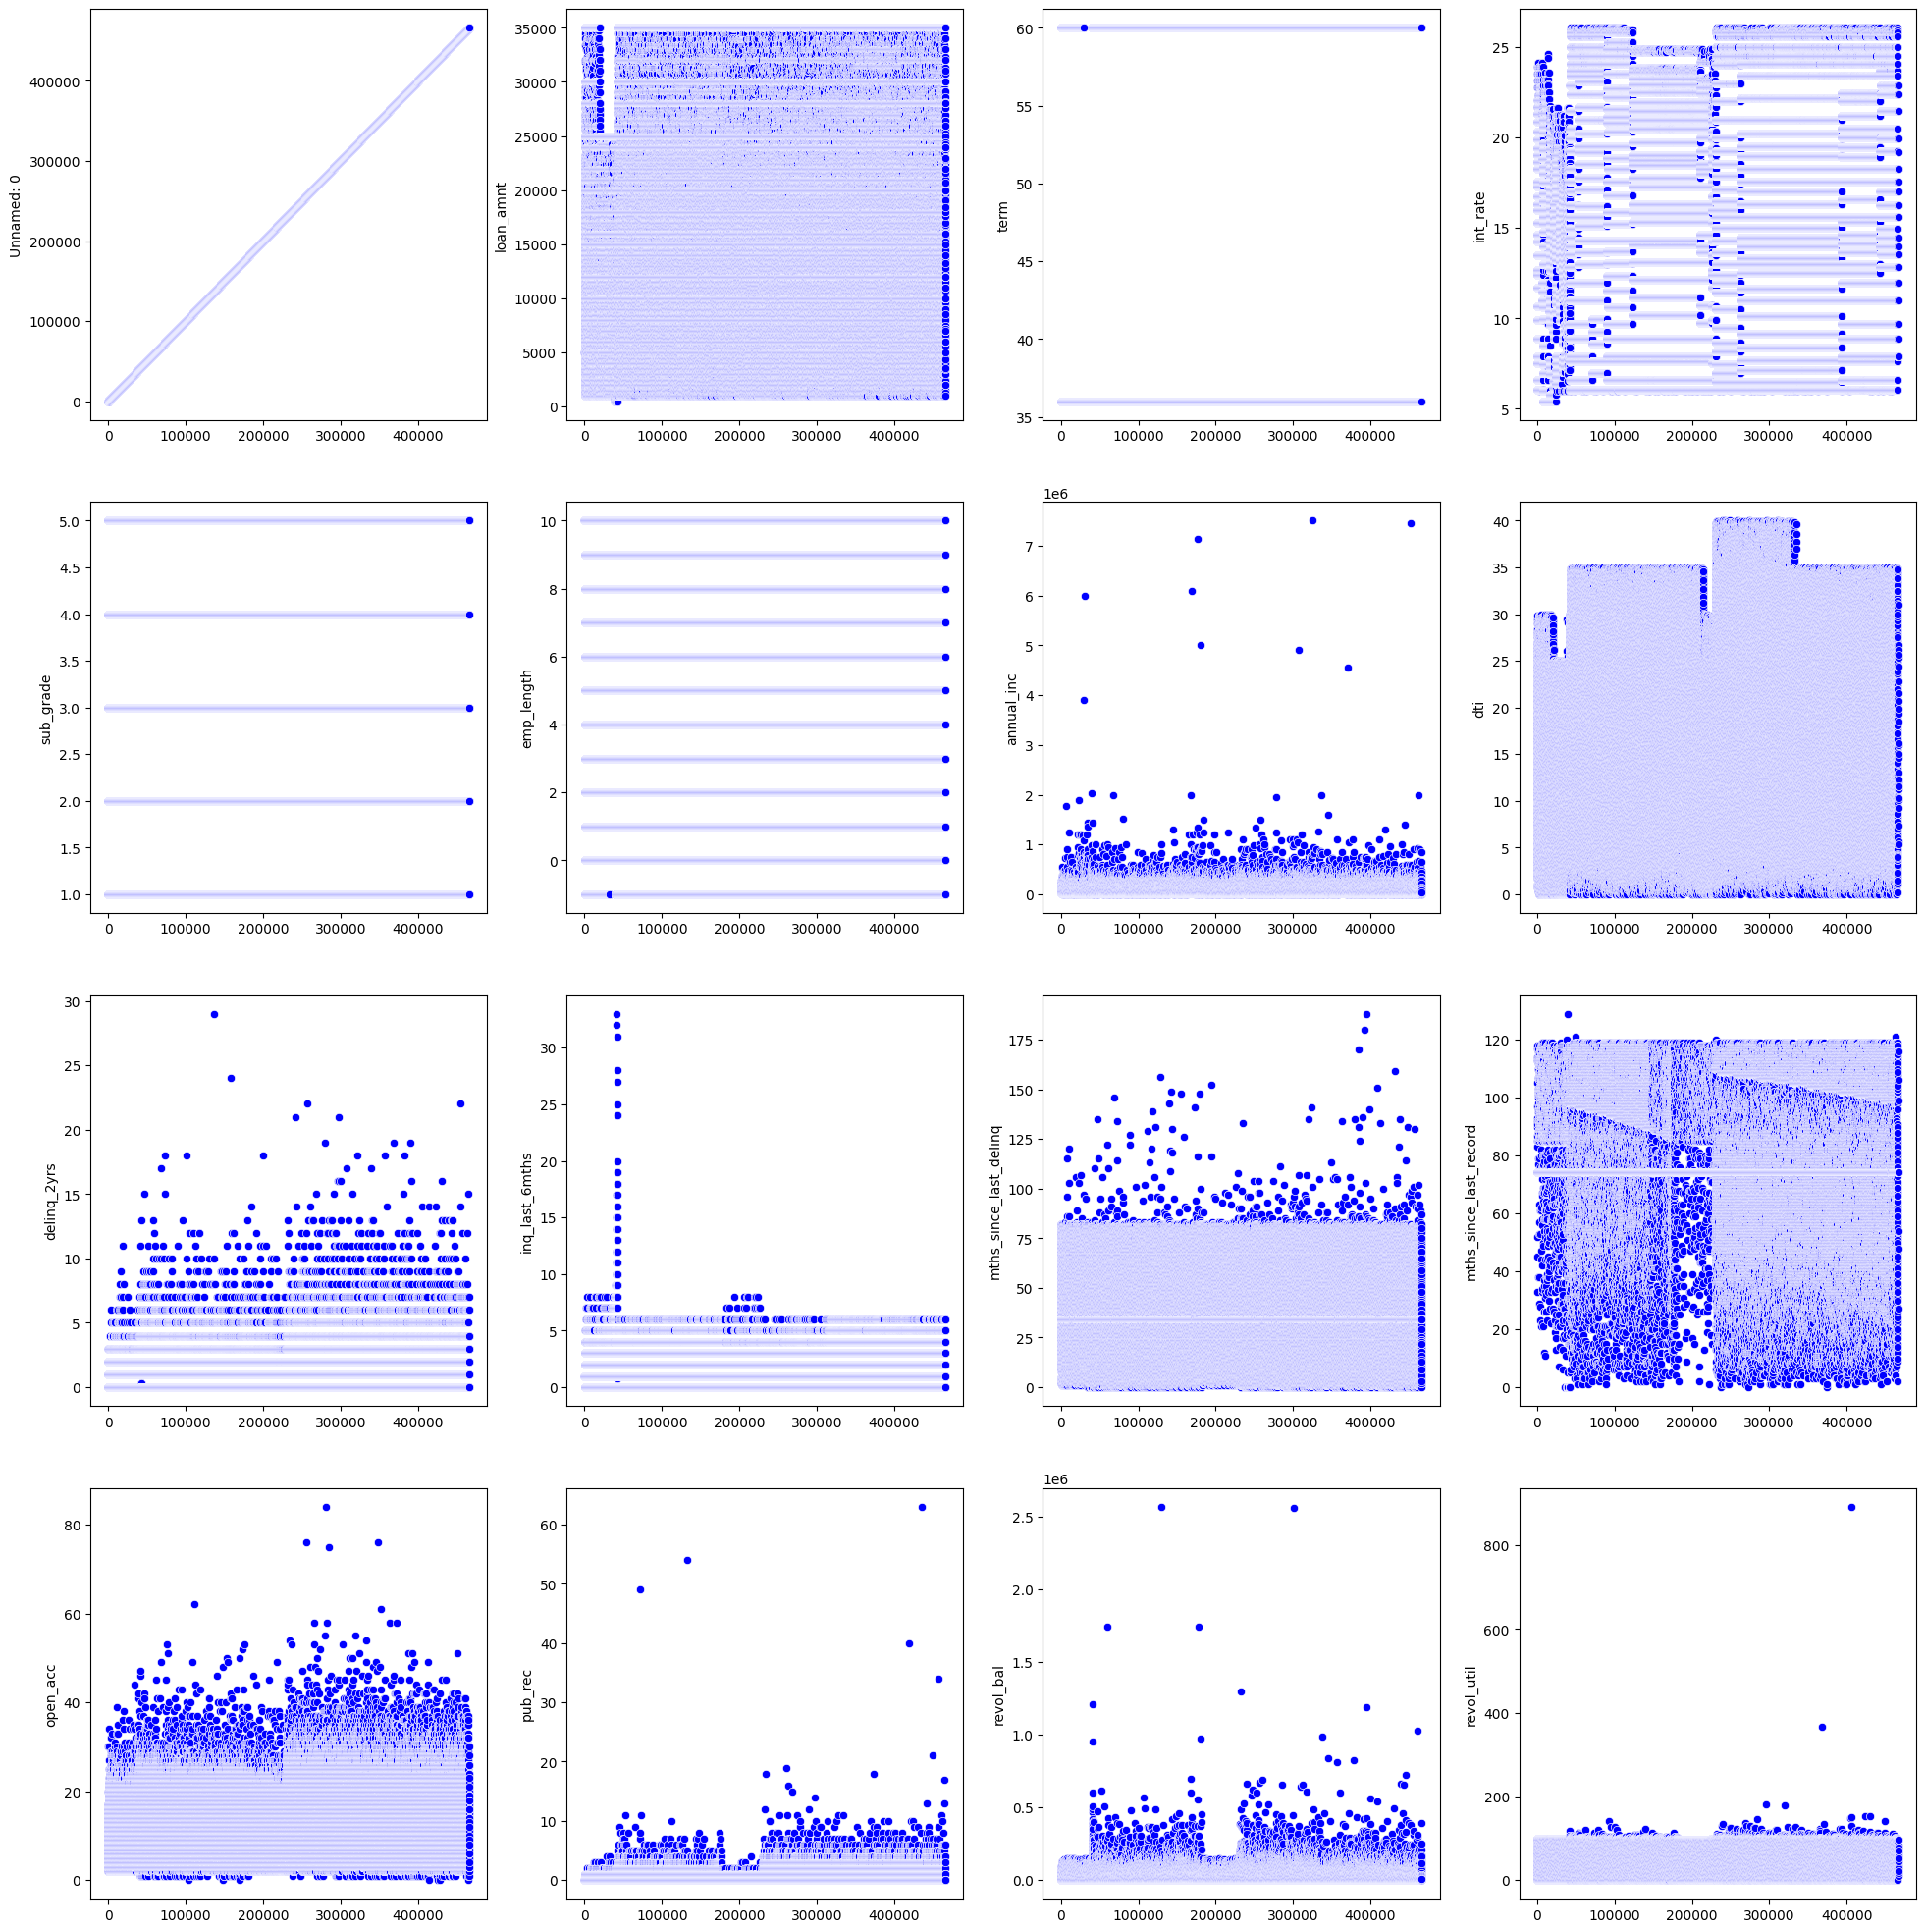

In [51]:
fig = plt.figure(figsize=(24, 25))

columns = 4
rows = 4


for i in range(16):
    fig.add_subplot(rows, columns, i+1)
    sns.scatterplot(df[numerical[i]], color="b")

plt.show()

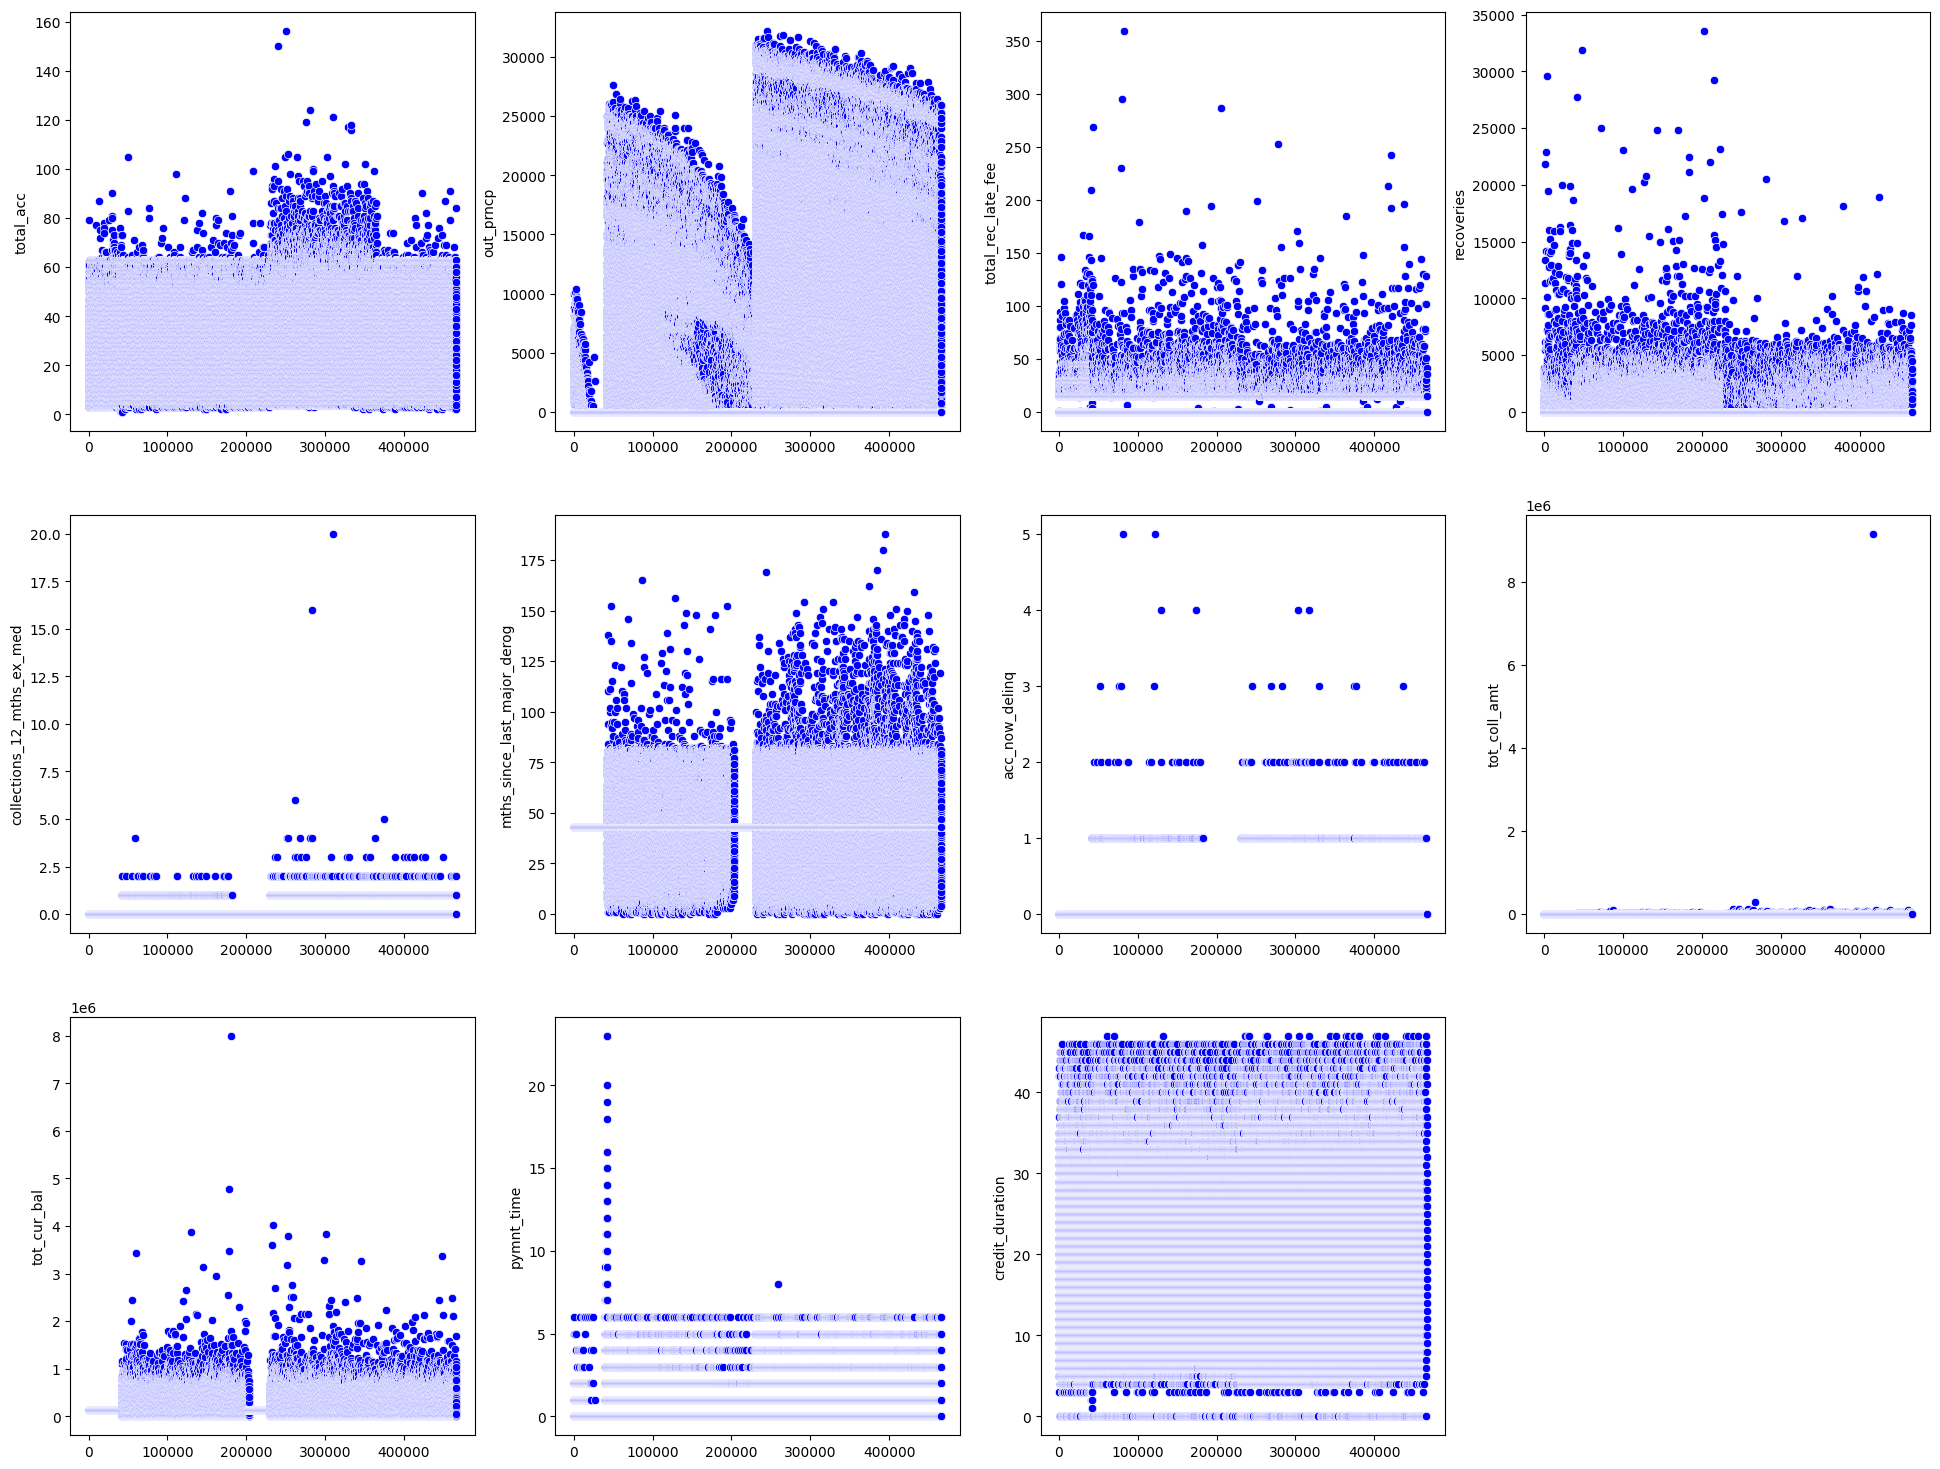

In [54]:
fig = plt.figure(figsize=(24, 25))

columns = 4
rows = 4

index = len(numerical) - 16

for i in range(index):
    fig.add_subplot(rows, columns, i+1)
    sns.scatterplot(df[numerical[i+16]], color="b")

plt.show()

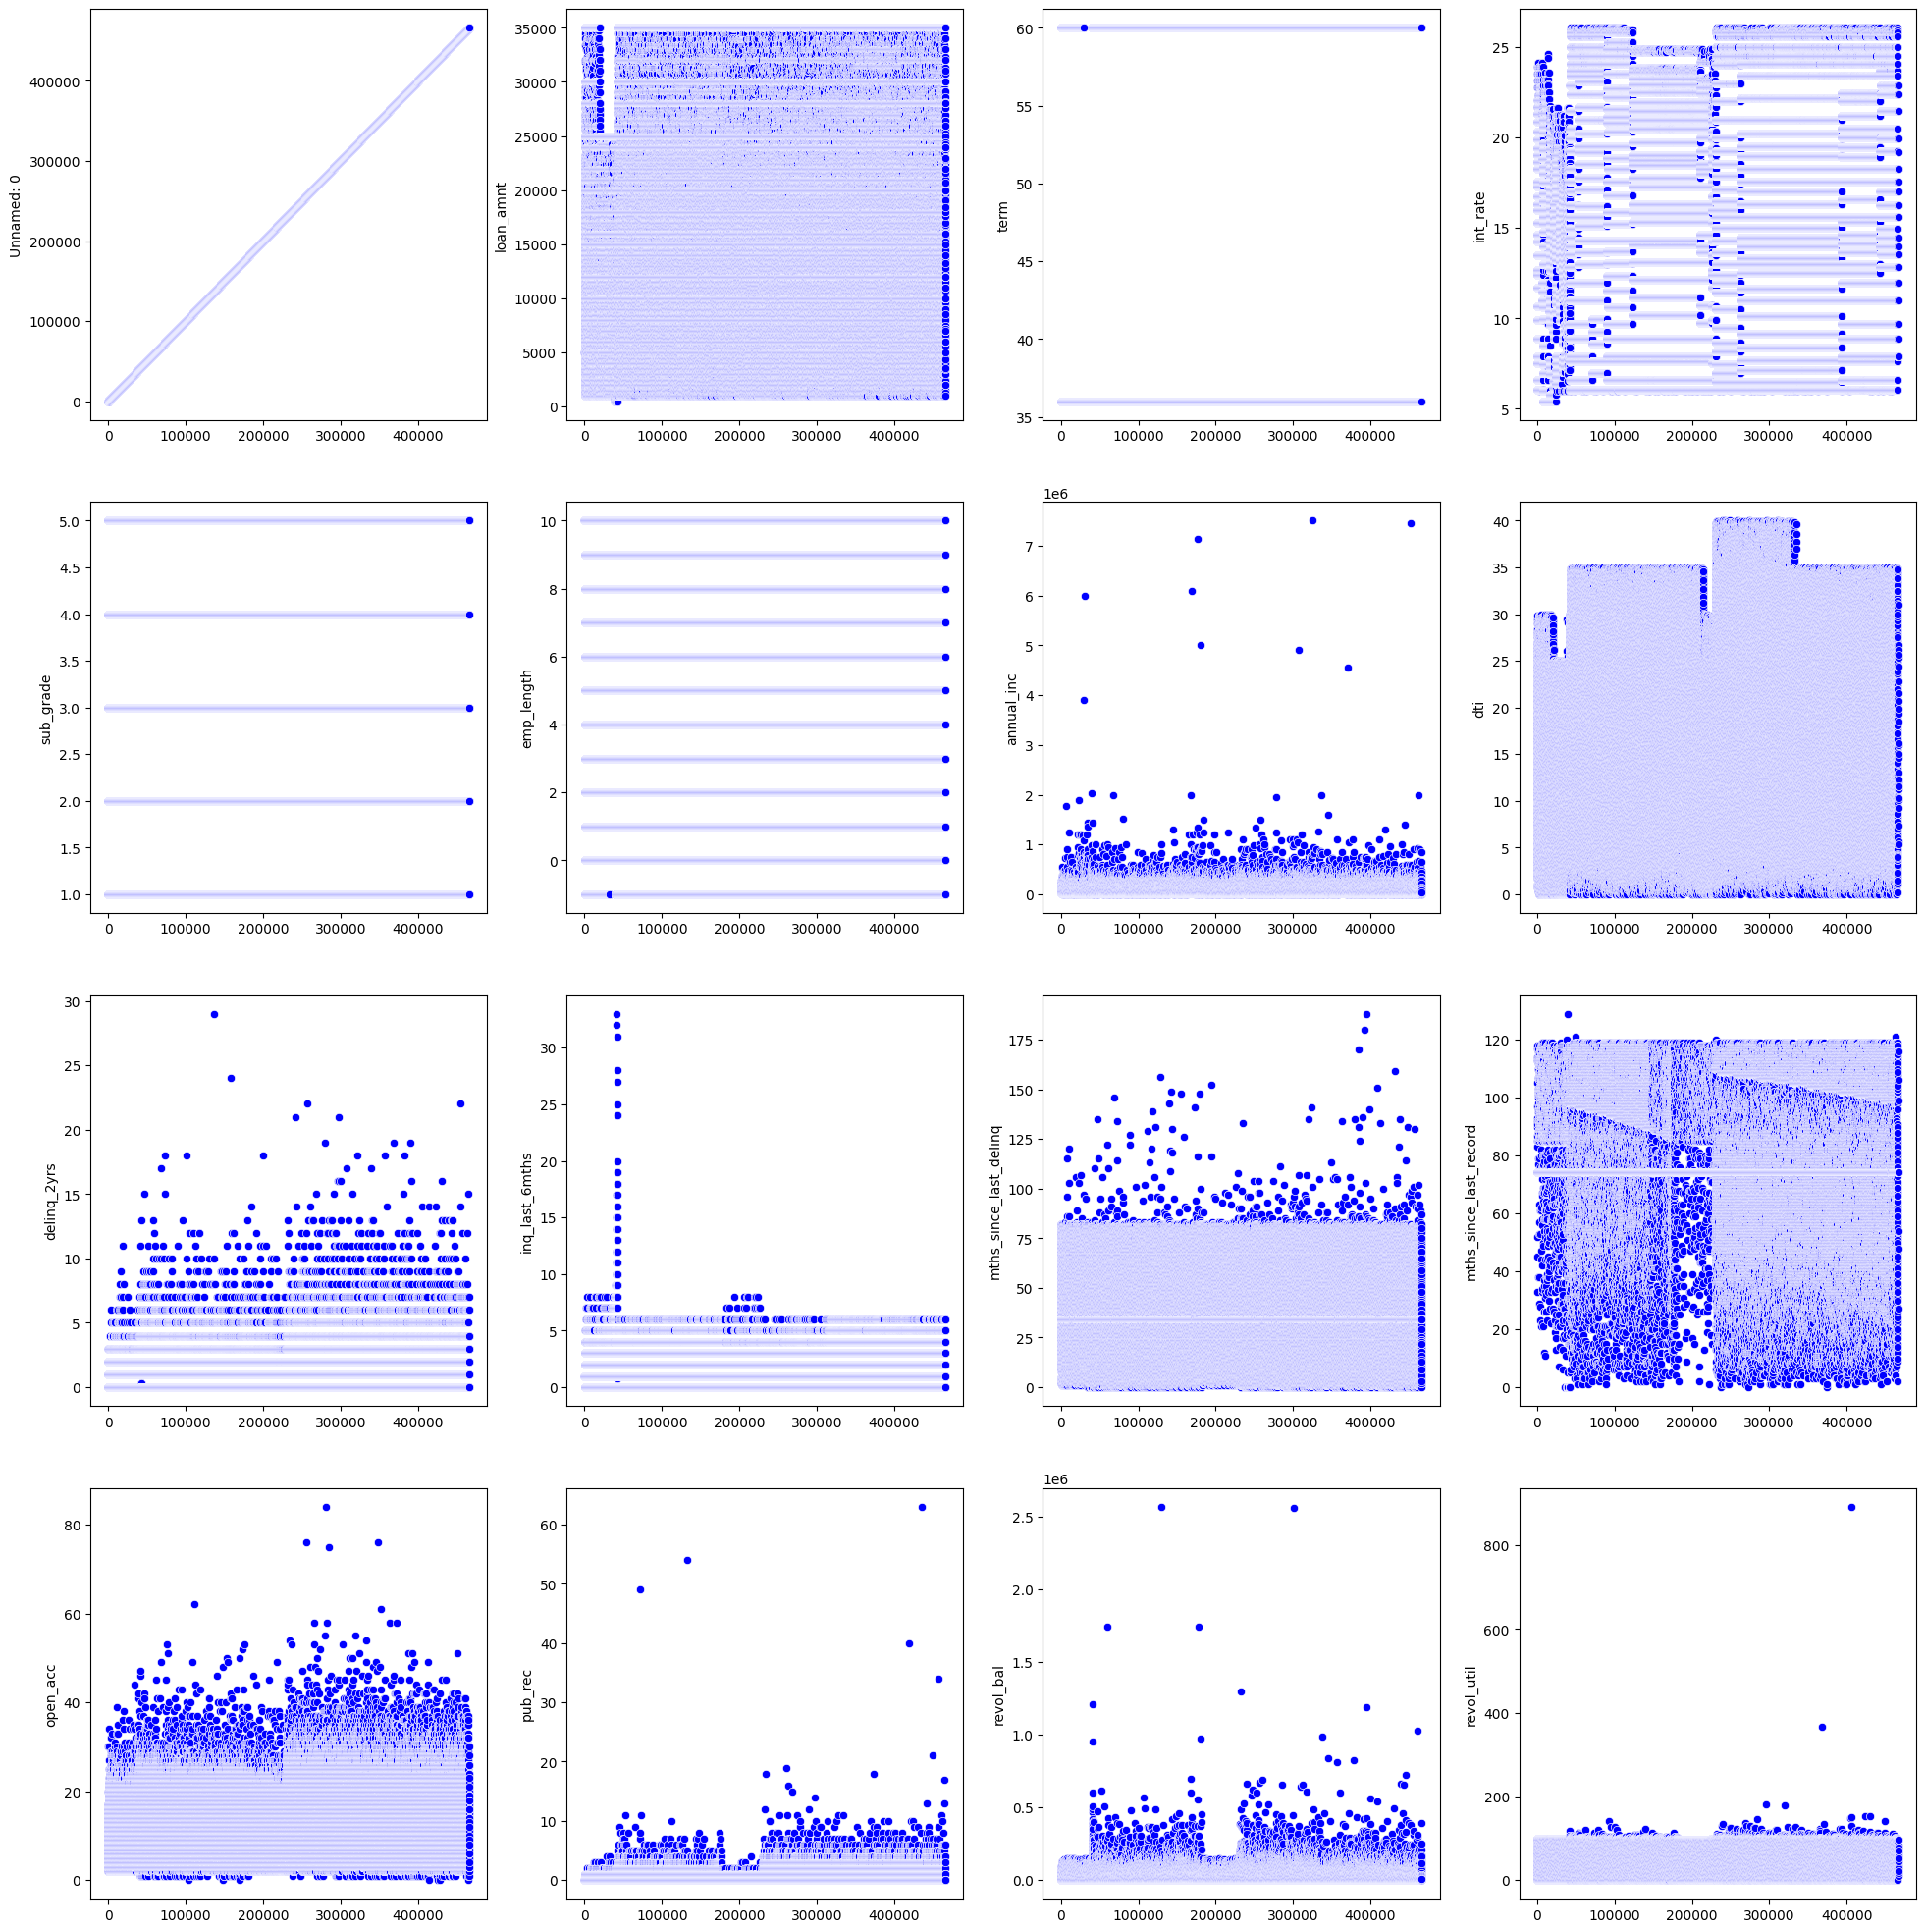

In [53]:
fig = plt.figure(figsize=(24, 25))

columns = 4
rows = 4


for i in range(16):
    fig.add_subplot(rows, columns, i+1)
    sns.scatterplot(df[numerical[i]], color="b")

plt.show()

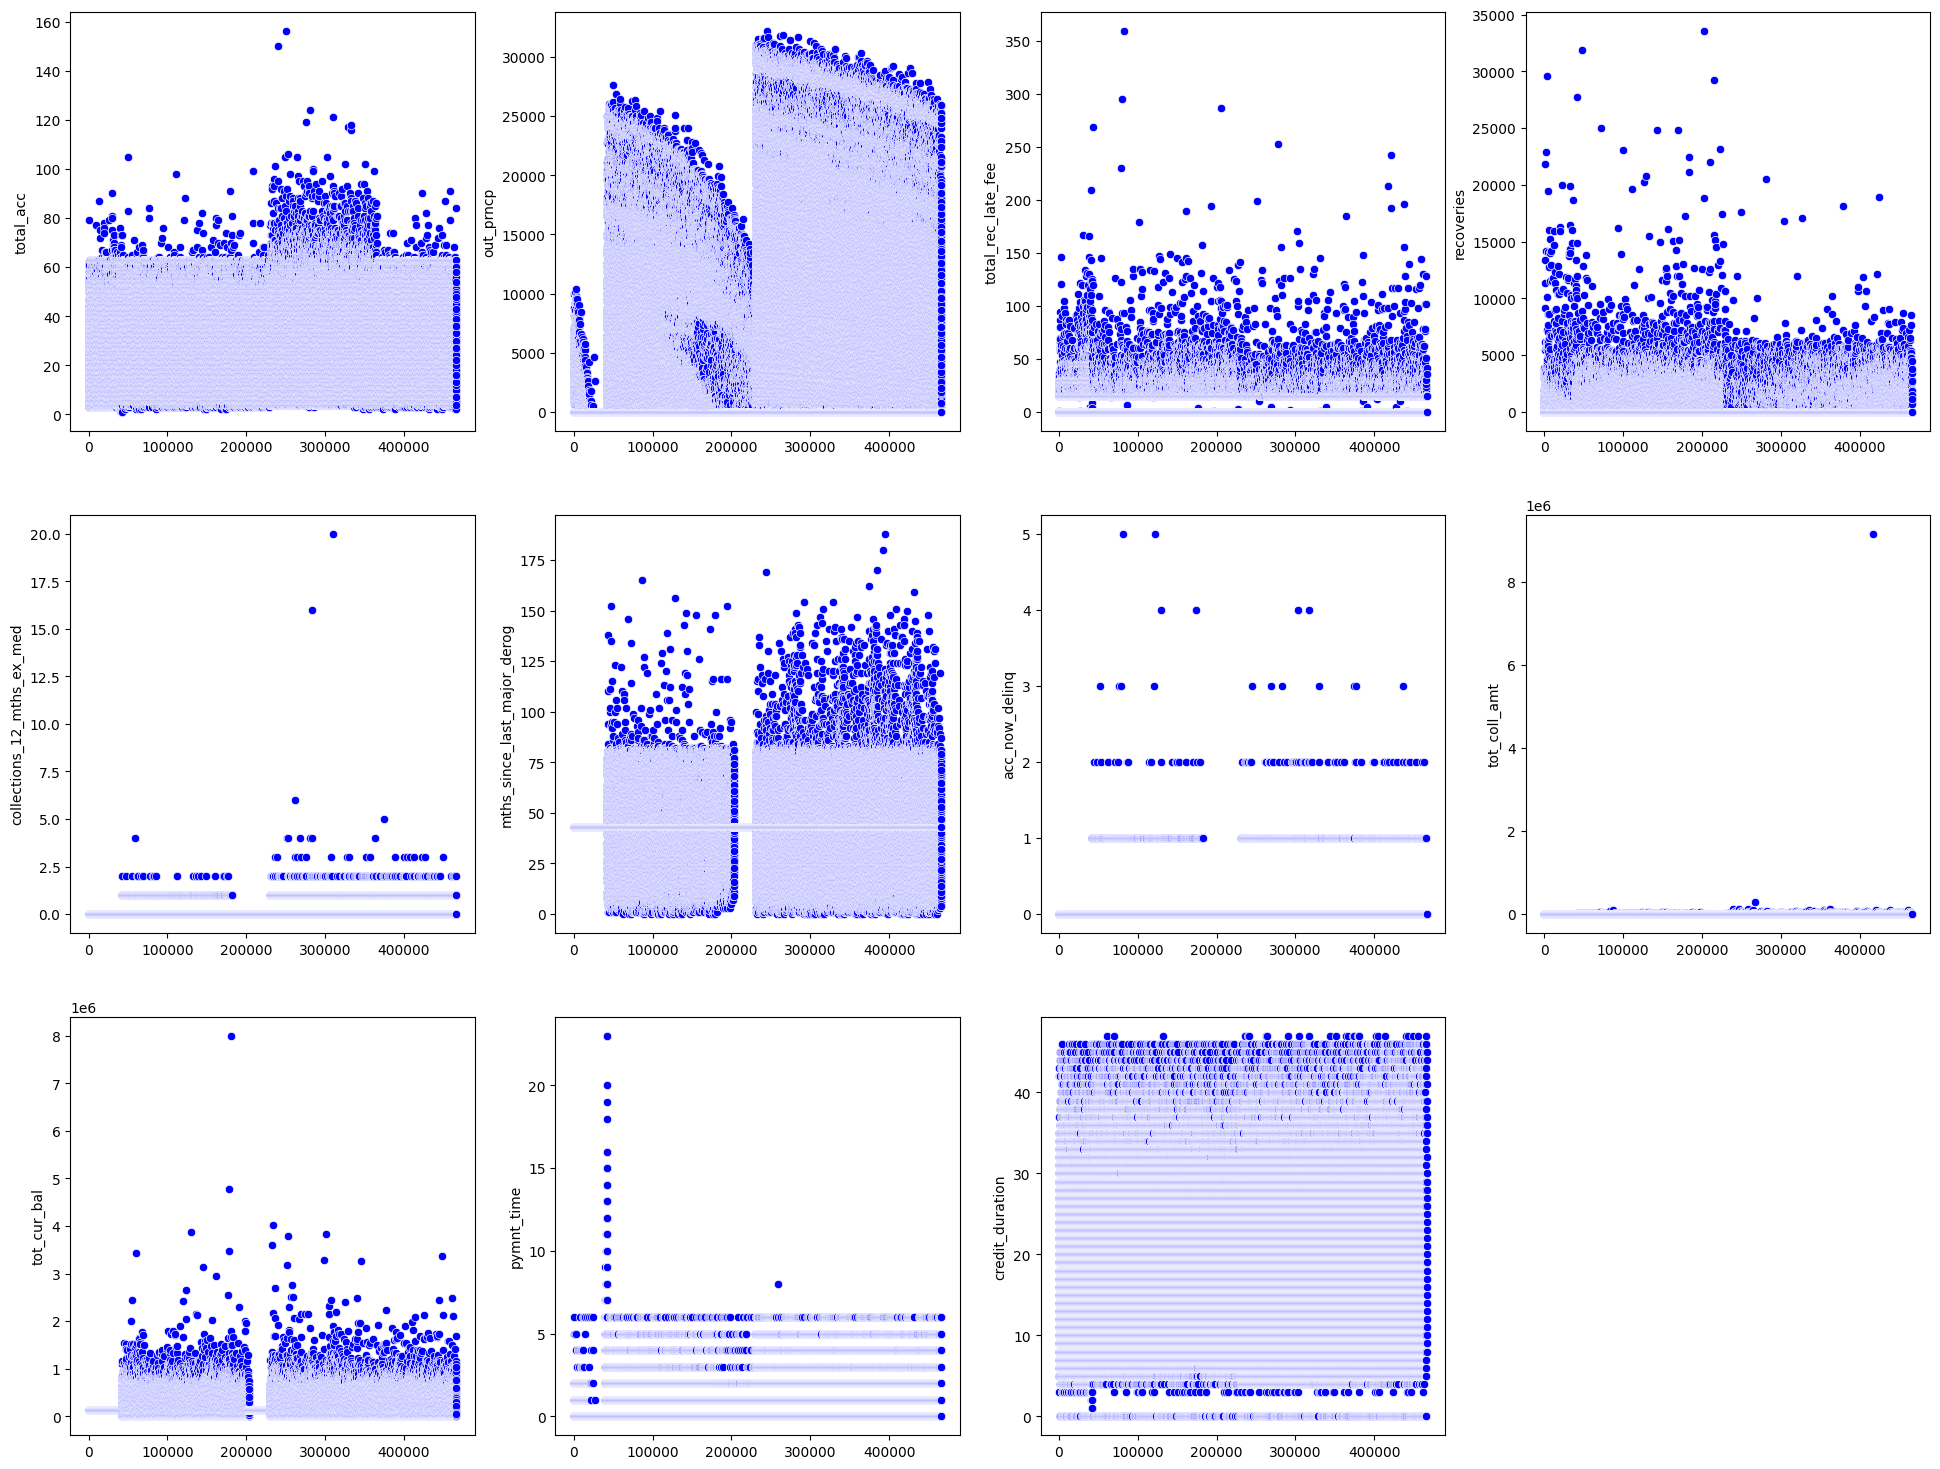

In [55]:
fig = plt.figure(figsize=(24, 25))

columns = 4
rows = 4

index = len(numerical) - 16

for i in range(index):
    fig.add_subplot(rows, columns, i+1)
    sns.scatterplot(df[numerical[i+16]], color="b")

plt.show()

In [56]:
def count_outliers(dataframe, column, multiplier=1.5):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)    
    iqr = q3 - q1
    
    lower_bound = q1 - (multiplier * iqr)
    upper_bound = q3 + (multiplier * iqr)
    
    outliers = len(dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)])
    
    return outliers

In [60]:
for col in numerical:
    outliers = count_outliers(df, col)
    print(col , 'have' , outliers , 'outliers out of' , len(df[col]) , '(',(outliers / len(df[col])) * 100 , '% )')

Unnamed: 0 have 0 outliers out of 466285 ( 0.0 % )
loan_amnt have 0 outliers out of 466285 ( 0.0 % )
term have 0 outliers out of 466285 ( 0.0 % )
int_rate have 4904 outliers out of 466285 ( 1.051717297361056 % )
sub_grade have 0 outliers out of 466285 ( 0.0 % )
emp_length have 0 outliers out of 466285 ( 0.0 % )
annual_inc have 19899 outliers out of 466285 ( 4.267561684377581 % )
dti have 43 outliers out of 466285 ( 0.009221827852064724 % )
delinq_2yrs have 83331 outliers out of 466285 ( 17.87125899396292 % )
inq_last_6mths have 36785 outliers out of 466285 ( 7.888952035772114 % )
mths_since_last_delinq have 212833 outliers out of 466285 ( 45.644402028802126 % )
mths_since_last_record have 62638 outliers out of 466285 ( 13.433415185991402 % )
open_acc have 10440 outliers out of 466285 ( 2.2389740180361795 % )
pub_rec have 61392 outliers out of 466285 ( 13.166196639394363 % )
revol_bal have 22879 outliers out of 466285 ( 4.906655800636949 % )
revol_util have 19 outliers out of 466285 ( 0

## **Defining Target Variable And Labeling**

In [61]:
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [62]:
good_dict = [
    'Current', 
    'Fully Paid', 
    'In Grace Period',
    'Does not meet the credit policy. Status:Fully Paid'
]

df['good_loan'] = np.where(df['loan_status'].isin(good_dict), 1, 0)

good_loan
1    414099
0     52186
Name: count, dtype: int64


Text(0.5, 1.0, 'Comparison of good loan and bad loan')

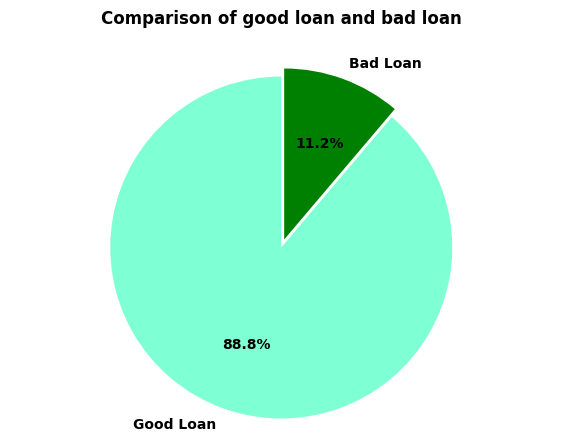

In [63]:
print(df['good_loan'].value_counts())

churn = df['good_loan'].value_counts()
text_props = {'weight': 'bold'}

plt.figure(figsize=(7, 5))
plt.pie(churn, labels=['Good Loan', 'Bad Loan'], autopct='%1.1f%%', startangle=90, colors=['aquamarine', 'green'], textprops=text_props, explode=(0.05, 0))
plt.axis('equal')
plt.title('Comparison of good loan and bad loan', fontweight='bold', pad=20)

In [64]:
df.drop('loan_status', axis=1, inplace=True)

## **Feature Scaling**

In [65]:
sc = StandardScaler()
scaled = pd.DataFrame(sc.fit_transform(df[numerical]), columns=numerical)

In [66]:
scaled.head()

Unnamed: 0  loan_amnt      term  int_rate  sub_grade  emp_length  \
0   -1.732047  -1.124392 -0.616225 -0.729587  -0.698965    1.128471   
1   -1.732040  -1.426088  1.622784  0.330634   0.728226   -1.482675   
2   -1.732032  -1.438156 -0.616225  0.488979   1.441821    1.128471   
3   -1.732025  -0.521001 -0.616225 -0.077850  -1.412560    1.128471   
4   -1.732017  -1.365749  1.622784 -0.261438   1.441821   -1.221560   

   annual_inc       dti  delinq_2yrs  inq_last_6mths  ...  out_prncp  \
0   -0.896551  1.328632    -0.357035        0.178877  ...  -0.693944   
1   -0.787387 -2.065791    -0.357035        3.843347  ...  -0.693944   
2   -1.110294 -1.082491    -0.357035        1.094994  ...  -0.693944   
3   -0.438063  0.354248    -0.357035        0.178877  ...  -0.693944   
4    0.122311  0.091865    -0.357035       -0.737241  ...  -0.573268   

   total_rec_late_fee  recoveries  collections_12_mths_ex_med  \
0           -0.123464   -0.154549                   -0.083634   
1           -0.123464    0.057470                   -0.083634   
2           -0.123464   -0.154549                   -0.083634   
3            3.099264   -0.154549                   -0.083634   
4           -0.123464   -0.154549                   -0.083634   

   mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                          0.0        -0.05831           0.0          0.0   
1                          0.0        -0.05831           0.0          0.0   
2                          0.0        -0.05831           0.0          0.0   
3                          0.0        -0.05831           0.0          0.0   
4                          0.0        -0.05831           0.0          0.0   

   pymnt_time  credit_duration  
0   -0.760280         1.899572  
1   -0.760280        -0.471354  
2   -0.760280        -0.471354  
3   -0.760280         0.086511  
4    0.471392         0.365443  

[5 rows x 27 columns]

## **Final Dataframe**

In [67]:
data = pd.concat([onehot, scaled, df[['good_loan']]], axis=1)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 51 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   home_ownership_MORTGAGE              466285 non-null  int32  
 1   home_ownership_OTHER                 466285 non-null  int32  
 2   home_ownership_OWN                   466285 non-null  int32  
 3   home_ownership_RENT                  466285 non-null  int32  
 4   verification_status_Not Verified     466285 non-null  int32  
 5   verification_status_Source Verified  466285 non-null  int32  
 6   verification_status_Verified         466285 non-null  int32  
 7   purpose_car                          466285 non-null  int32  
 8   purpose_credit_card                  466285 non-null  int32  
 9   purpose_debt_consolidation           466285 non-null  int32  
 10  purpose_educational                  466285 non-null  int32  
 11  purpose_home_

In [69]:
data.to_csv('preprocessed_data.csv', index=False)

## **Modeling**

In [70]:
X = data.drop('good_loan', axis=1)
y = data['good_loan']

In [71]:
y.value_counts()

good_loan
1    414099
0     52186
Name: count, dtype: int64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((326399, 50), (139886, 50), (326399,), (139886,))

## **Training**

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

### **Naive Bayes**

In [74]:
gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_prob = gnb.fit(X_train, y_train).predict_proba(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 139886 points : 10986


In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.55      0.61     15750
           1       0.94      0.97      0.96    124136

    accuracy                           0.92    139886
   macro avg       0.82      0.76      0.78    139886
weighted avg       0.92      0.92      0.92    139886



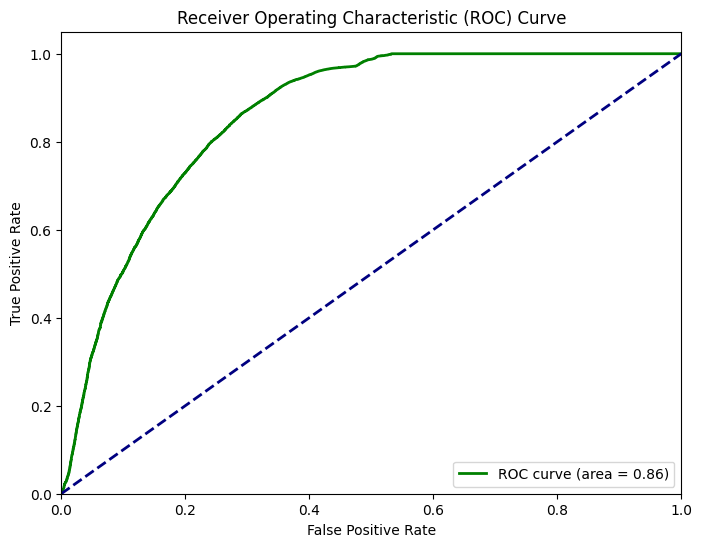

In [76]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [77]:
class0 = y_prob[y_test == 0]
class1 = y_prob[y_test == 1]

ks = ks_2samp(class0, class1)

print("Kolmogorov-Smirnov (KS) : %.4f" % ks.statistic[1])

Kolmogorov-Smirnov (KS) : 0.5731


### **Logistic Regression**

In [78]:
lr = LogisticRegression()

y_pred = lr.fit(X_train, y_train).predict(X_test)
y_prob = lr.fit(X_train, y_train).predict_proba(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 139886 points : 8007


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.50      0.66     15750
           1       0.94      1.00      0.97    124136

    accuracy                           0.94    139886
   macro avg       0.96      0.75      0.82    139886
weighted avg       0.95      0.94      0.93    139886



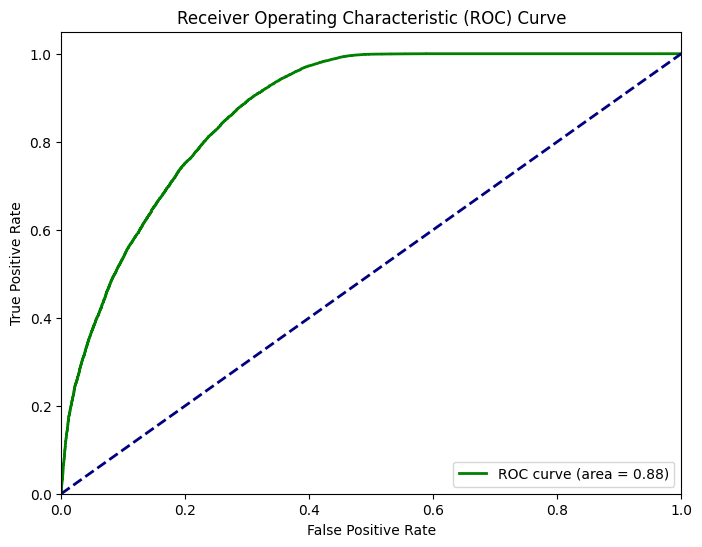

In [80]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [81]:
class0 = y_prob[y_test == 0]
class1 = y_prob[y_test == 1]

ks = ks_2samp(class0, class1)

print("Kolmogorov-Smirnov (KS) : %.4f" % ks.statistic[1])

Kolmogorov-Smirnov (KS) : 0.5937


### **K Nearest Neighbors**

In [82]:
knn = KNeighborsClassifier()

y_pred = knn.fit(X_train, y_train).predict(X_test)
y_prob = knn.fit(X_train, y_train).predict_proba(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 139886 points : 10593


In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.40      0.54     15750
           1       0.93      0.99      0.96    124136

    accuracy                           0.92    139886
   macro avg       0.89      0.69      0.75    139886
weighted avg       0.92      0.92      0.91    139886



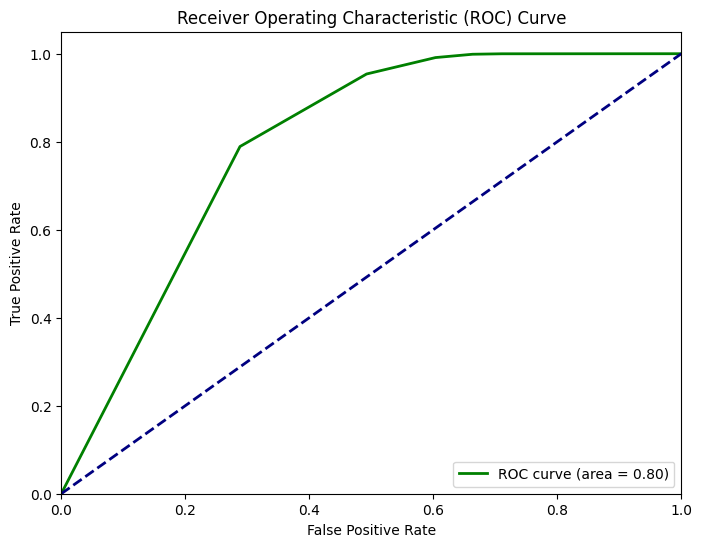

In [84]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [85]:
class0 = y_prob[y_test == 0]
class1 = y_prob[y_test == 1]

ks = ks_2samp(class0, class1)

print("Kolmogorov-Smirnov (KS) : %.4f" % ks.statistic[1])

Kolmogorov-Smirnov (KS) : 0.5008


### **Decision Tree**

In [86]:
dt = DecisionTreeClassifier()

y_pred = dt.fit(X_train, y_train).predict(X_test)
y_prob = dt.fit(X_train, y_train).predict_proba(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 139886 points : 11556


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.66      0.64     15750
           1       0.96      0.95      0.95    124136

    accuracy                           0.92    139886
   macro avg       0.79      0.81      0.80    139886
weighted avg       0.92      0.92      0.92    139886



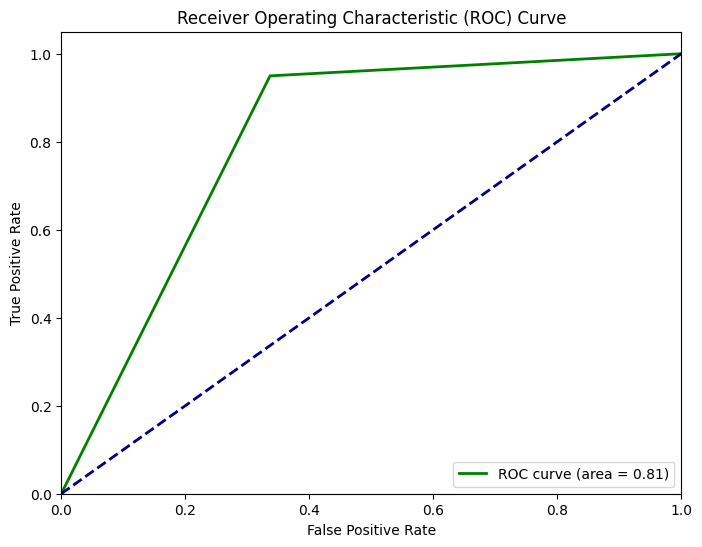

In [88]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [89]:
class0 = y_prob[y_test == 0]
class1 = y_prob[y_test == 1]

ks = ks_2samp(class0, class1)

print("Kolmogorov-Smirnov (KS) : %.4f" % ks.statistic[1])

Kolmogorov-Smirnov (KS) : 0.6130


### **Gradient Boosting**

In [90]:
gbc = GradientBoostingClassifier()

y_pred = gbc.fit(X_train, y_train).predict(X_test)
y_prob = gbc.fit(X_train, y_train).predict_proba(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 139886 points : 6346


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     15750
           1       0.95      1.00      0.98    124136

    accuracy                           0.95    139886
   macro avg       0.97      0.80      0.86    139886
weighted avg       0.96      0.95      0.95    139886



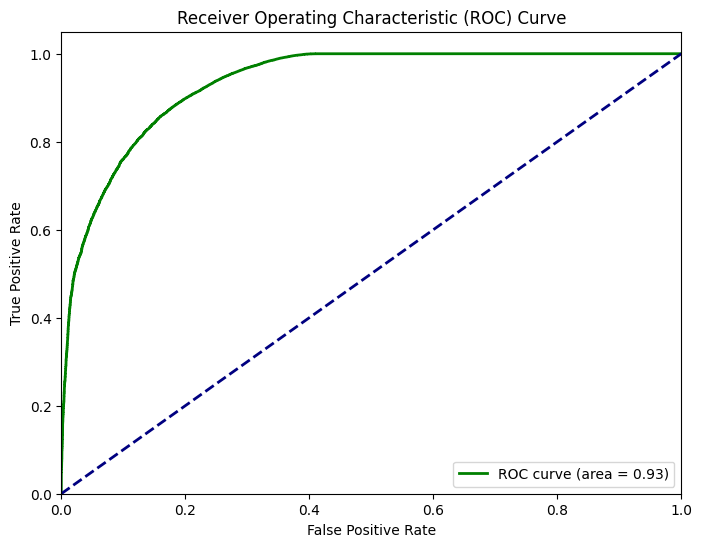

In [92]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [93]:
class0 = y_prob[y_test == 0]
class1 = y_prob[y_test == 1]

ks = ks_2samp(class0, class1)

print("Kolmogorov-Smirnov (KS) : %.4f" % ks.statistic[1])

Kolmogorov-Smirnov (KS) : 0.6997


### **XGBoost**

In [94]:
xgbc = xgb.XGBClassifier()

y_pred = xgbc.fit(X_train, y_train).predict(X_test)
y_prob = xgbc.fit(X_train, y_train).predict_proba(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 139886 points : 6439


In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.61      0.75     15750
           1       0.95      1.00      0.97    124136

    accuracy                           0.95    139886
   macro avg       0.96      0.80      0.86    139886
weighted avg       0.95      0.95      0.95    139886



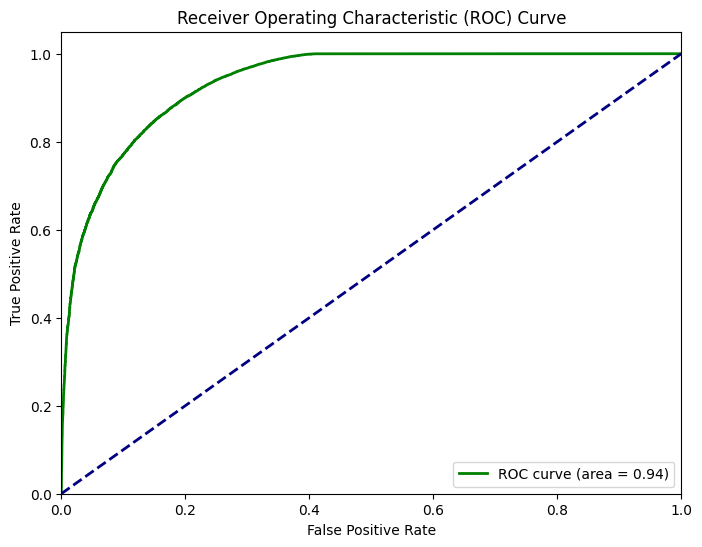

In [96]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [97]:
class0 = y_prob[y_test == 0]
class1 = y_prob[y_test == 1]

ks = ks_2samp(class0, class1)

print("Kolmogorov-Smirnov (KS) : %.4f" % ks.statistic[1])

Kolmogorov-Smirnov (KS) : 0.7008


## **Model Optimization And Evaluation**

### **Hyperparameter Turning**

In [98]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]    
}

grid_search = GridSearchCV(estimator=xgbc, param_grid=param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters : " , grid_search.best_params_)

Best Hyperparameters :  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [99]:
best_xgbc = grid_search.best_estimator_

best_xgbc.fit(X_train, y_train)

print("Accuracy : " , best_xgbc.score(X_test, y_test))

Accuracy :  0.9544486224497091


### **Model Retrain**

In [100]:
y_pred = best_xgbc.fit(X_train, y_train).predict(X_test)
y_prob = best_xgbc.fit(X_train, y_train).predict_proba(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 139886 points : 6372


In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     15750
           1       0.95      1.00      0.97    124136

    accuracy                           0.95    139886
   macro avg       0.97      0.80      0.86    139886
weighted avg       0.96      0.95      0.95    139886



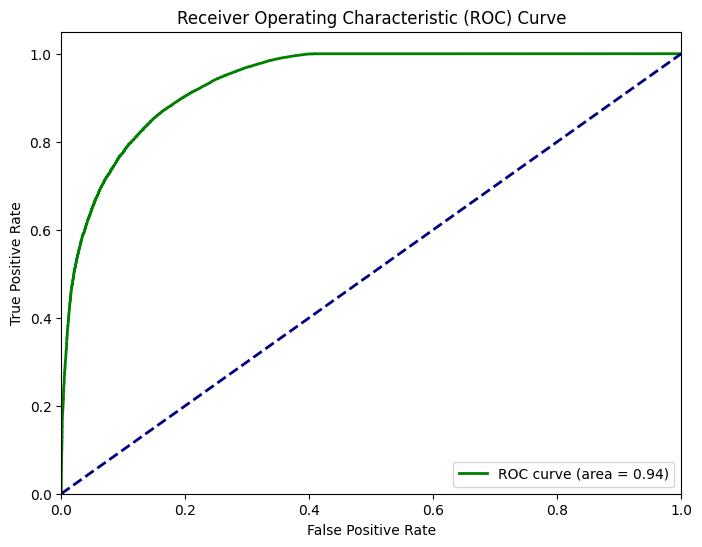

In [102]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [103]:
class0 = y_prob[y_test == 0]
class1 = y_prob[y_test == 1]

ks = ks_2samp(class0, class1)

print("Kolmogorov-Smirnov (KS) : %.4f" % ks.statistic[1])

Kolmogorov-Smirnov (KS) : 0.7066


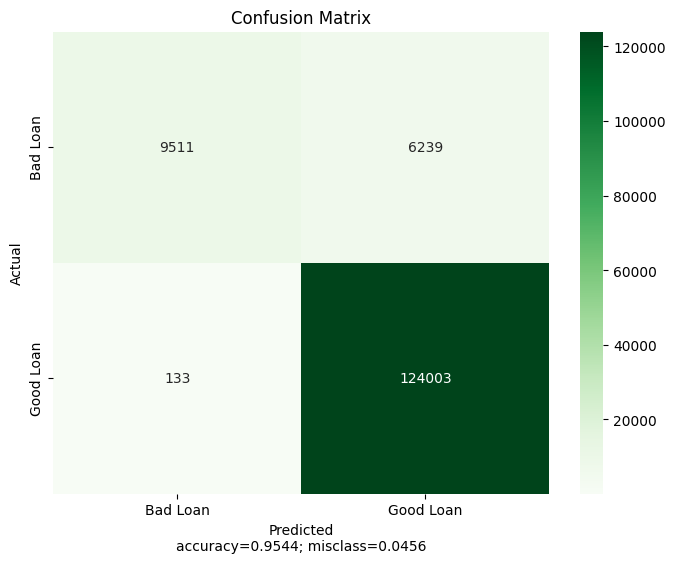

In [104]:
conf_matrix = confusion_matrix(y_test, y_pred)
target_names = ['Bad Loan', 'Good Loan']

accuracy = np.trace(conf_matrix) / np.sum(conf_matrix).astype('float')
misclass = 1 - accuracy

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.show()

### **Learning Curve**

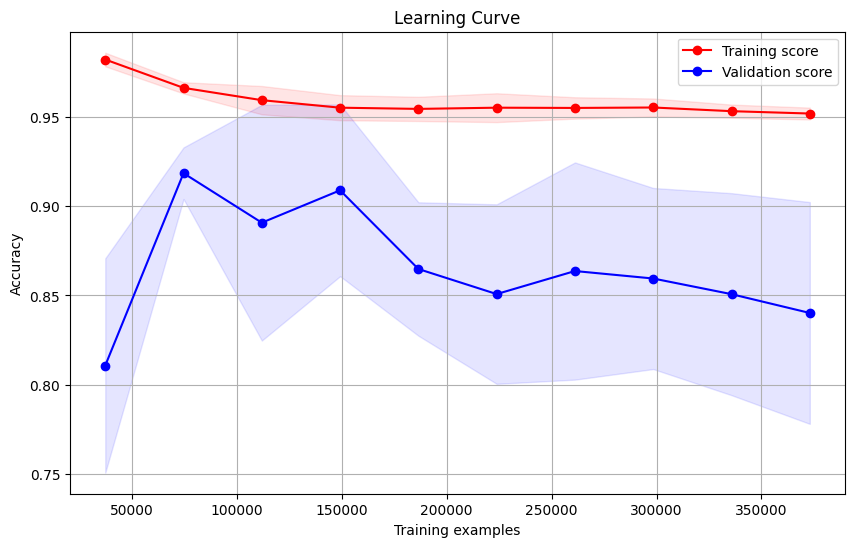

In [105]:
train_sizes = np.linspace(0.1, 1.0, 10)

model = best_xgbc

train_sizes_abs, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=5, scoring='roc_auc')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="b")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="b", label="Validation score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [106]:
print("Mean training scores:", train_scores_mean)
print("Standard deviation of training scores:", train_scores_std)
print("Mean validation scores:", test_scores_mean)
print("Standard deviation of validation scores:", test_scores_std)

Mean training scores: [0.98238958 0.96649304 0.9595832  0.95536429 0.95468555 0.95536478
 0.95522115 0.95547174 0.95341167 0.95208766]
Standard deviation of training scores: [0.00382526 0.00315813 0.00795446 0.00704073 0.00679924 0.00809904
 0.00599807 0.00505938 0.00369898 0.00332418]
Mean validation scores: [0.81064791 0.91859707 0.89081951 0.90898918 0.8648213  0.85075837
 0.86368678 0.85948826 0.85070569 0.84014652]
Standard deviation of validation scores: [0.06015954 0.01448478 0.06615638 0.04819944 0.03744429 0.0503729
 0.0609544  0.05081809 0.05669083 0.06224192]


## **Feature Importance**

In [107]:
importances = best_xgbc.feature_importances_

indices = np.argsort(importances)[::-1]

feature = X_train.columns

top_indices = indices[:10]

for i in range(10):
    print("%d. %s (%.4f)" % (i + 1, feature[top_indices[i]], importances[top_indices[i]] * 100))

1. recoveries (77.4290)
2. pymnt_time (9.9876)
3. out_prncp (3.7837)
4. total_rec_late_fee (1.2431)
5. term (0.7904)
6. int_rate (0.7187)
7. initial_list_status_f (0.6834)
8. Unnamed: 0 (0.3670)
9. dti (0.3481)
10. annual_inc (0.2983)


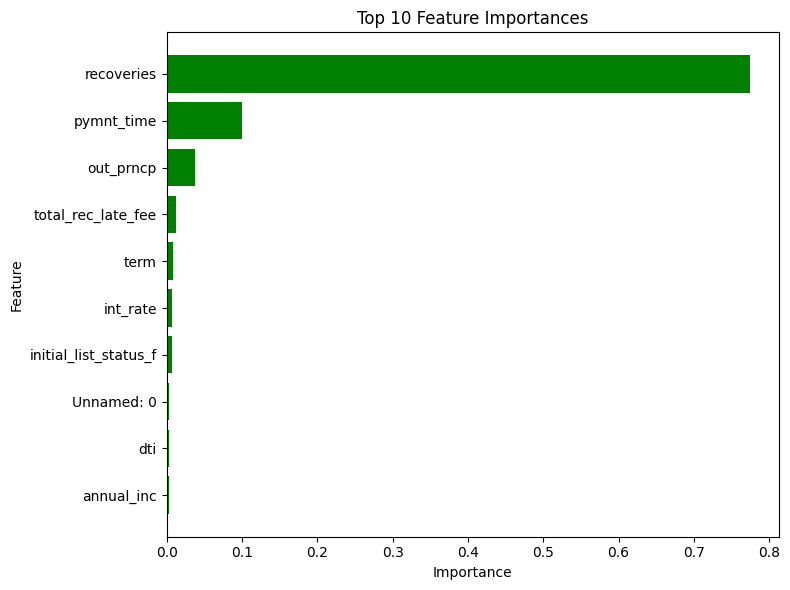

In [108]:
plt.figure(figsize=(8, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(10), importances[top_indices][::-1], align="center", color = 'g')
plt.yticks(range(10), feature[top_indices][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### **Importance Feature Training**

In [109]:
X_important = data[['recoveries', 'pymnt_time', 'out_prncp', 'total_rec_late_fee', 'term', 'initial_list_status_f', 'int_rate']]
new_X_train = X_train[['recoveries', 'pymnt_time', 'out_prncp', 'total_rec_late_fee', 'term', 'initial_list_status_f', 'int_rate']]
new_X_test = X_test[['recoveries', 'pymnt_time', 'out_prncp', 'total_rec_late_fee', 'term', 'initial_list_status_f', 'int_rate']]

new_X_train.shape, new_X_test.shape

((326399, 7), (139886, 7))

In [110]:
new_model = best_xgbc

y_pred = new_model.fit(new_X_train, y_train).predict(new_X_test)
y_prob = new_model.fit(new_X_train, y_train).predict_proba(new_X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 139886 points : 6422


In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     15750
           1       0.95      1.00      0.97    124136

    accuracy                           0.95    139886
   macro avg       0.97      0.80      0.86    139886
weighted avg       0.96      0.95      0.95    139886



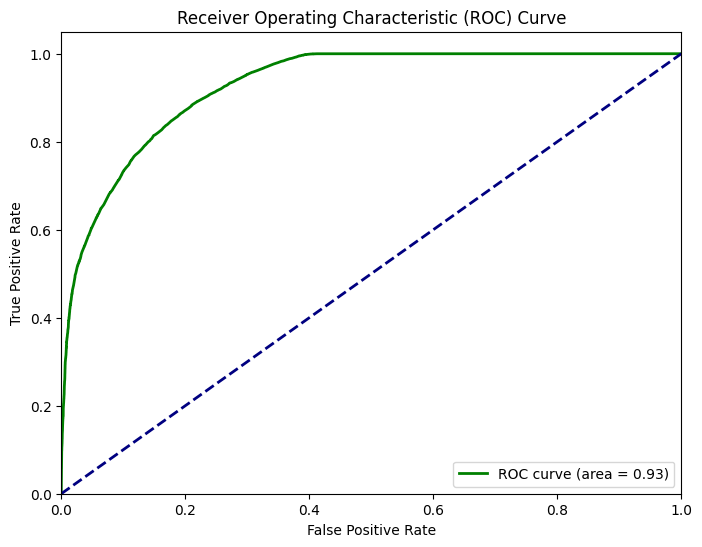

In [112]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2,
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [113]:
class0 = y_prob[y_test == 0]
class1 = y_prob[y_test == 1]

ks = ks_2samp(class0, class1)

print("Kolmogorov-Smirnov (KS) : %.4f" % ks.statistic[1])

Kolmogorov-Smirnov (KS) : 0.6730


Jadi, perbedaan hasil yang diperoleh ternyata cukup kecil.

Sebagai kesimpulan, model yang kami pilih adalah XGBoost Classifier. Fitur-fitur penting dalam model kami adalah:

* `recoveries` : Menunjukkan apakah ada rencana pembayaran yang telah diterapkan untuk pinjaman.
* `pymnt_time` : Jumlah bulan antara `last_pymnt_d` dan `next_pymnt_d`.
* `out_prncp` : Sisa pokok pinjaman yang belum dibayar dari total dana yang diberikan.
* `total_rec_late_fee` : Denda keterlambatan yang telah diterima hingga saat ini.
* `term` : Jumlah pembayaran dalam pinjaman. Nilainya dalam bulan dan bisa berupa 36 atau 60 bulan.
* `initial_list_status_f` : Status pencatatan awal pinjaman. Nilai yang mungkin adalah Whole atau Fractional (dalam kasus ini adalah Fractional).
* `int_rate` : Menunjukkan apakah pendapatan peminjam diverifikasi oleh LC, tidak diverifikasi, atau jika sumber pendapatan telah diverifikasi.

In [114]:
new_data = pd.concat([df[['recoveries', 'pymnt_time', 'out_prncp', 'total_rec_late_fee', 'term', 'int_rate']], onehot['initial_list_status_f']], axis=1)

scaler = StandardScaler()
scaled_important = pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)

scaled_important.sample(10)

pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [115]:
model = grid_search.best_estimator_
model.fit(scaled_important, y)

pickle.dump(model, open('xgb.pkl', 'wb'))